## <p style="font-family: Arial; color:red; font-style:bold"><br>I Business understanding </p>
### The objective is to reduce customer churn in telecommunications by predicting which customers are likely to leave and addressing the reasons behind it, improving retention, loyalty, and profitability. With a monthly churn rate of 2.6%, predicting churn is key to cost-effective retention strategies. The project aims to use machine learning to predict churn, identify key drivers, and support retention strategies. Success will be measured by reducing churn, increasing retention, and providing actionable insights. Challenges include imbalanced data, balancing model accuracy with interpretability, and ensuring insights align with business needs. Deliverables will include a churn prediction model and analysis of churn drivers.</p>

# buisiness objectives :

# 1- Minimize revenue loss by identifying the trends and behaviors that influence the likelihood of customer churn in the telecommunications industry and implementing retention strategies.

# 2- Improve customer loyalty by finding the reason behind customer churn

# 3- Help decision-makers to interve at the right time to prevent the churn operation

# II Data Understanding

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import KFold
import lime
from lime.lime_tabular import LimeTabularExplainer

In [268]:
data20 =  pd.read_csv('./churn-bigml-20.csv')
data80 =  pd.read_csv('./churn-bigml-80.csv')
data20 = pd.DataFrame(data20)
data80 = pd.DataFrame(data80)



In [269]:
data80.head()

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [270]:
data80.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [271]:
data80.describe()

       Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.21573

In [272]:
data20.describe()

       Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000               0.000000         146.250000   
50%        102.000000  415.000000               0.000000         178.300000   
75%        128.000000  415.000000              20.000000         220.700000   
max        232.000000  510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       667.000000        667.000000         667.000000       667.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std          20.396790          9.436463        

In [273]:
print(data20.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

### we can see that not all our data is numerical (state,International plan ..)

## EXAMINE TARGET VALUE 


In [274]:
data80['Churn'].value_counts()
data80['Churn'].value_counts(normalize=True)


Churn
False    0.854464
True     0.145536
Name: proportion, dtype: float64

In [275]:
data20['Churn'].value_counts()
data20['Churn'].value_counts(normalize=True)


Churn
False    0.857571
True     0.142429
Name: proportion, dtype: float64

# Exploratory data analysis

### to see the plot for churn we need to change the true and false value to numerique one

In [276]:
data80['Churn'] = data80['Churn'].apply(lambda x: 0 if x == False else 1)
data20['Churn'] = data20['Churn'].apply(lambda x: 0 if x == False else 1)

Percentage of True: 14.55%
Percentage of False: 85.45%


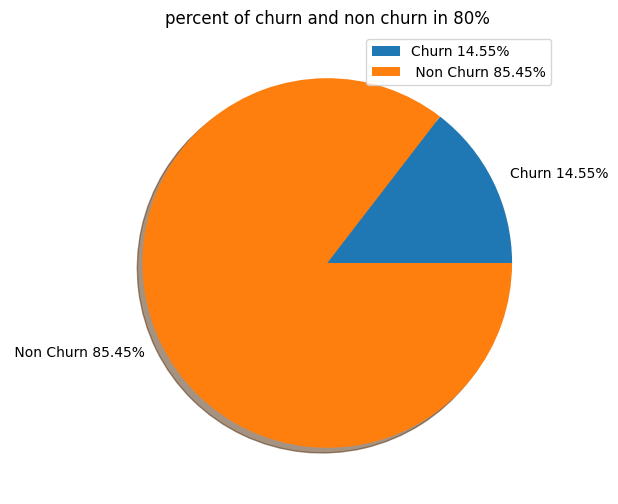

In [277]:
churn_counts = data80['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
plt.pie([churn_counts.get(1, 0),churn_counts.get(0, 0)],labels=[f"Churn {churn_counts.get(1, 0):.2f}%",f" Non Churn {churn_counts.get(0, 0):.2f}%"],shadow = True)
plt.legend()
plt.title('percent of churn and non churn in 80%')
print(f"Percentage of True: {churn_counts.get(1, 0):.2f}%")
print(f"Percentage of False: {churn_counts.get(0, 0):.2f}%")



Percentage of True: 14.24%
Percentage of False: 85.76%


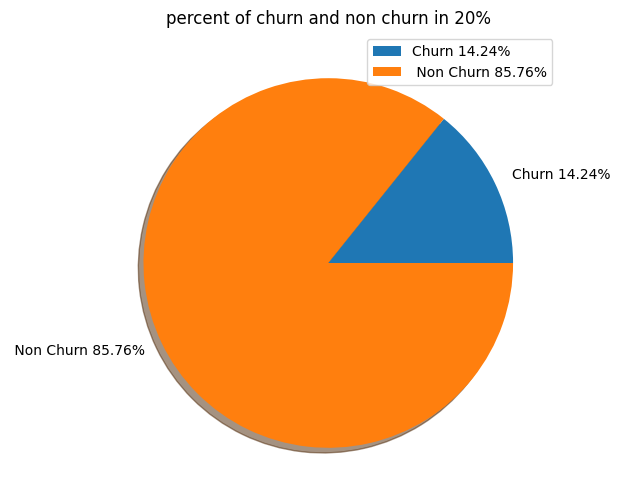

In [278]:
churn_counts = data20['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
plt.pie([churn_counts.get(1, 0),churn_counts.get(0, 0)],labels=[f"Churn {churn_counts.get(1, 0):.2f}%",f" Non Churn {churn_counts.get(0, 0):.2f}%"],shadow = True)
plt.legend()
plt.title('percent of churn and non churn in 20%')
print(f"Percentage of True: {churn_counts.get(1, 0):.2f}%")
print(f"Percentage of False: {churn_counts.get(0, 0):.2f}%")

### we can see that the target label is unbalanced so we will see if this can affect our pridiction or no 

### visualising outliers

# note for outliers it is for us should not be sended to teacher 
### Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

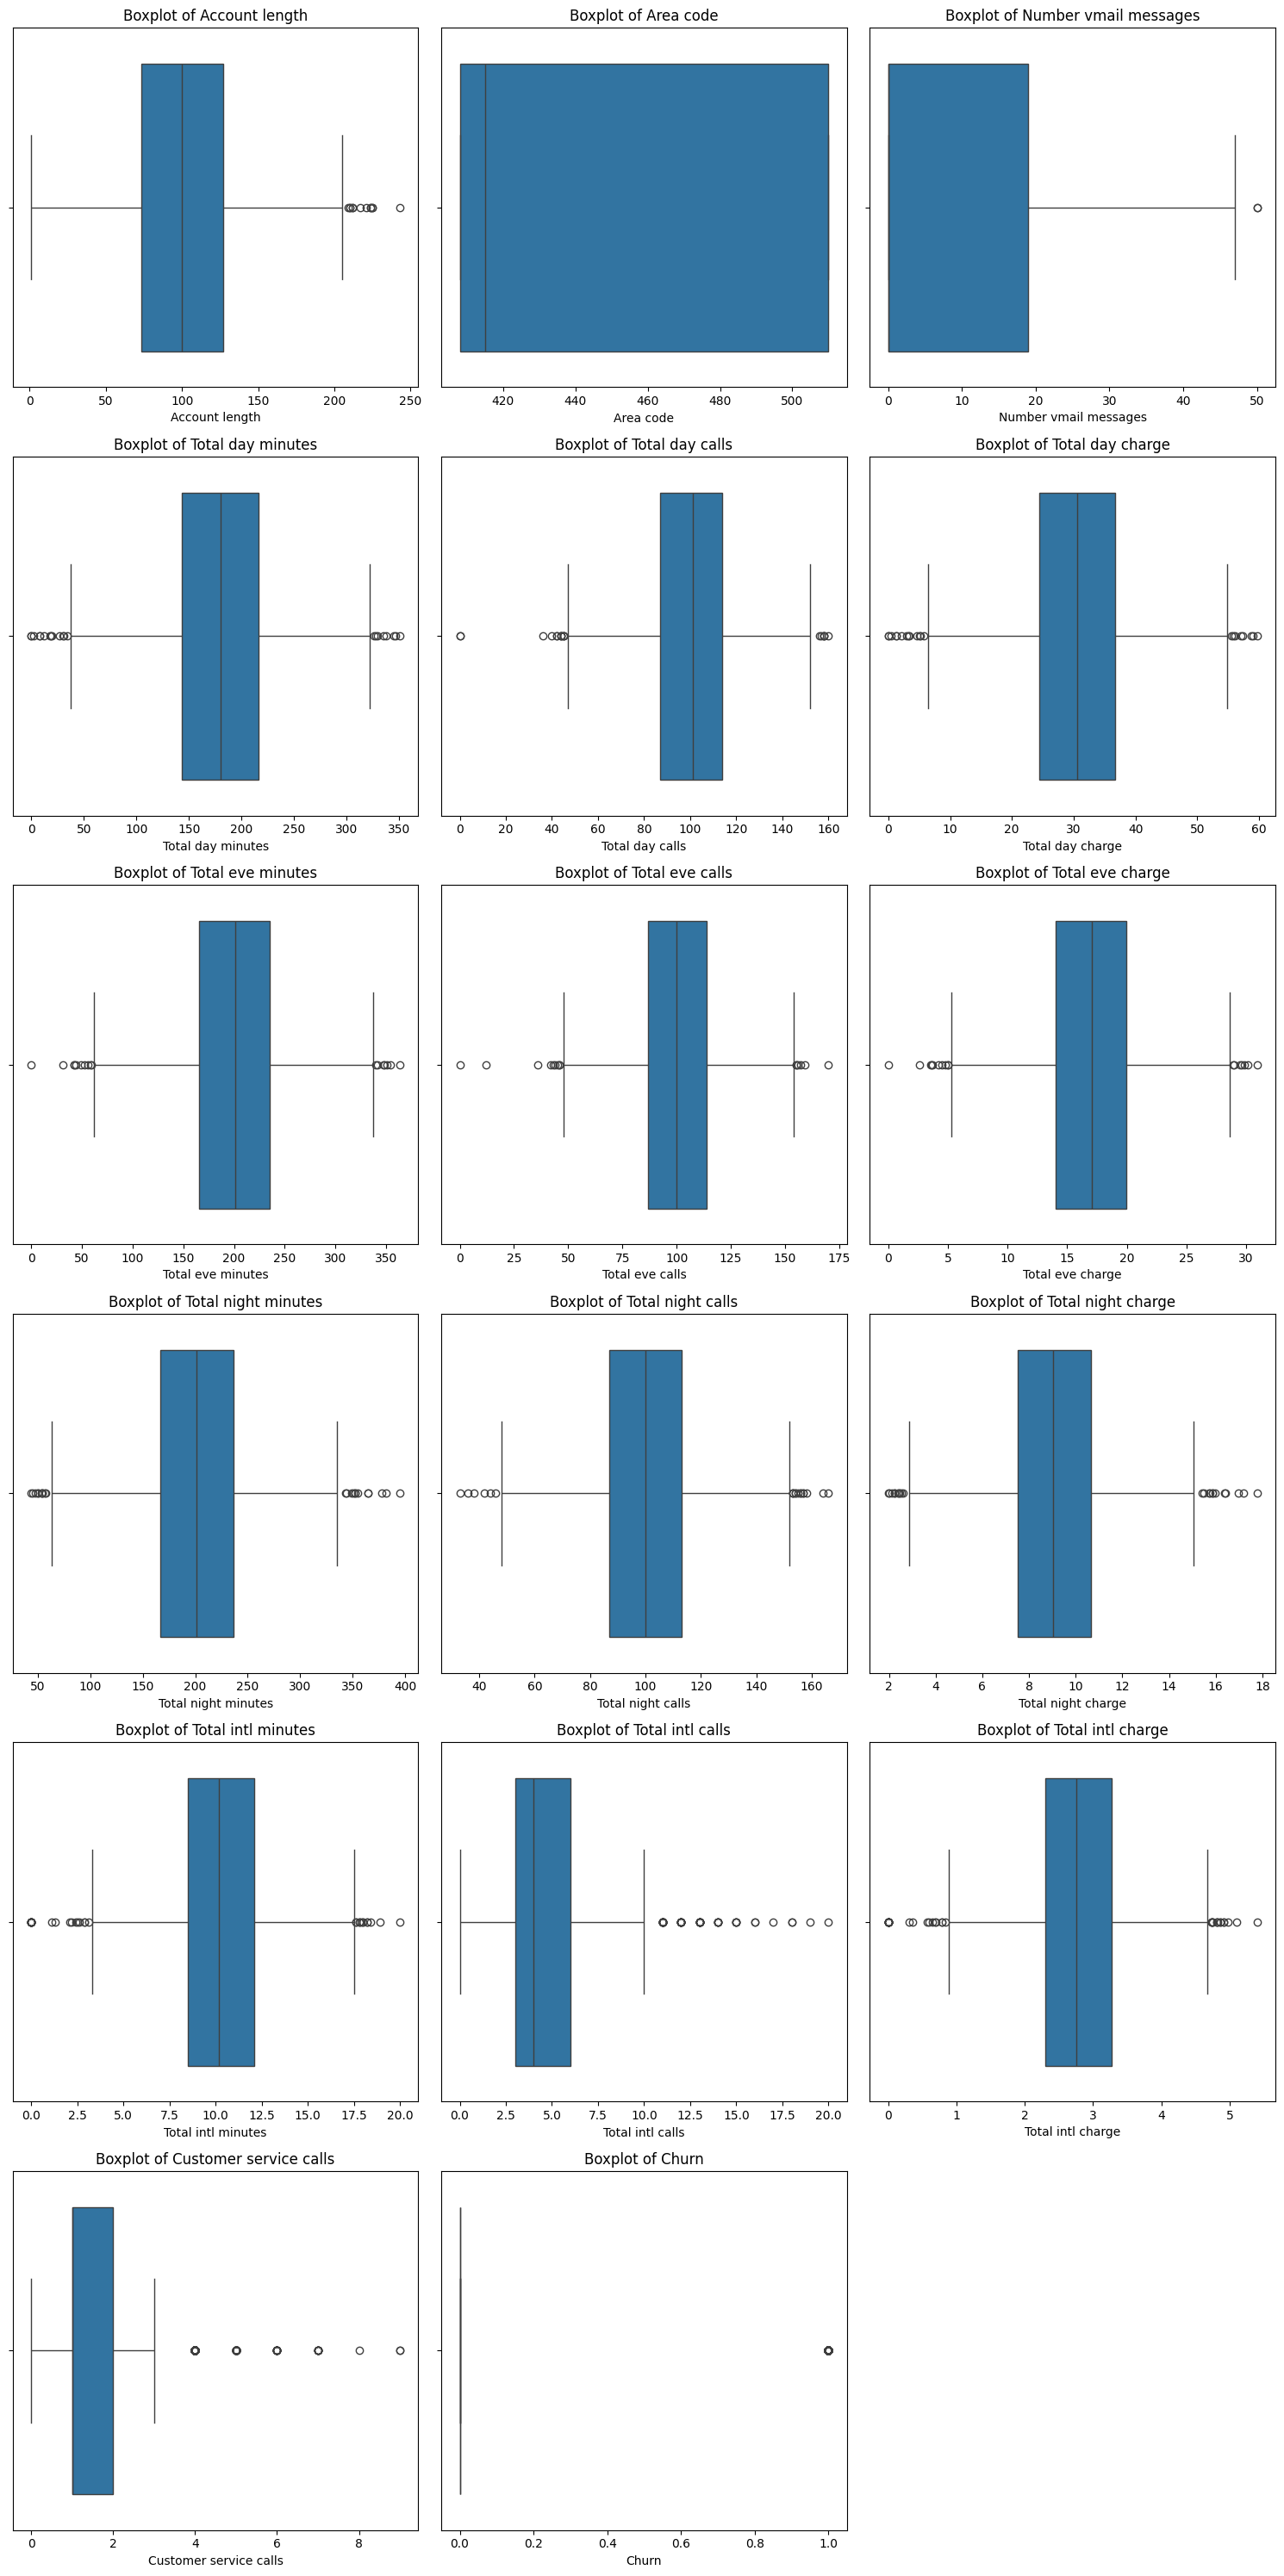

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
data =data80.select_dtypes(include=['int64','float64'])
variables = data.columns

n_rows = (len(variables) + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=data, x=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

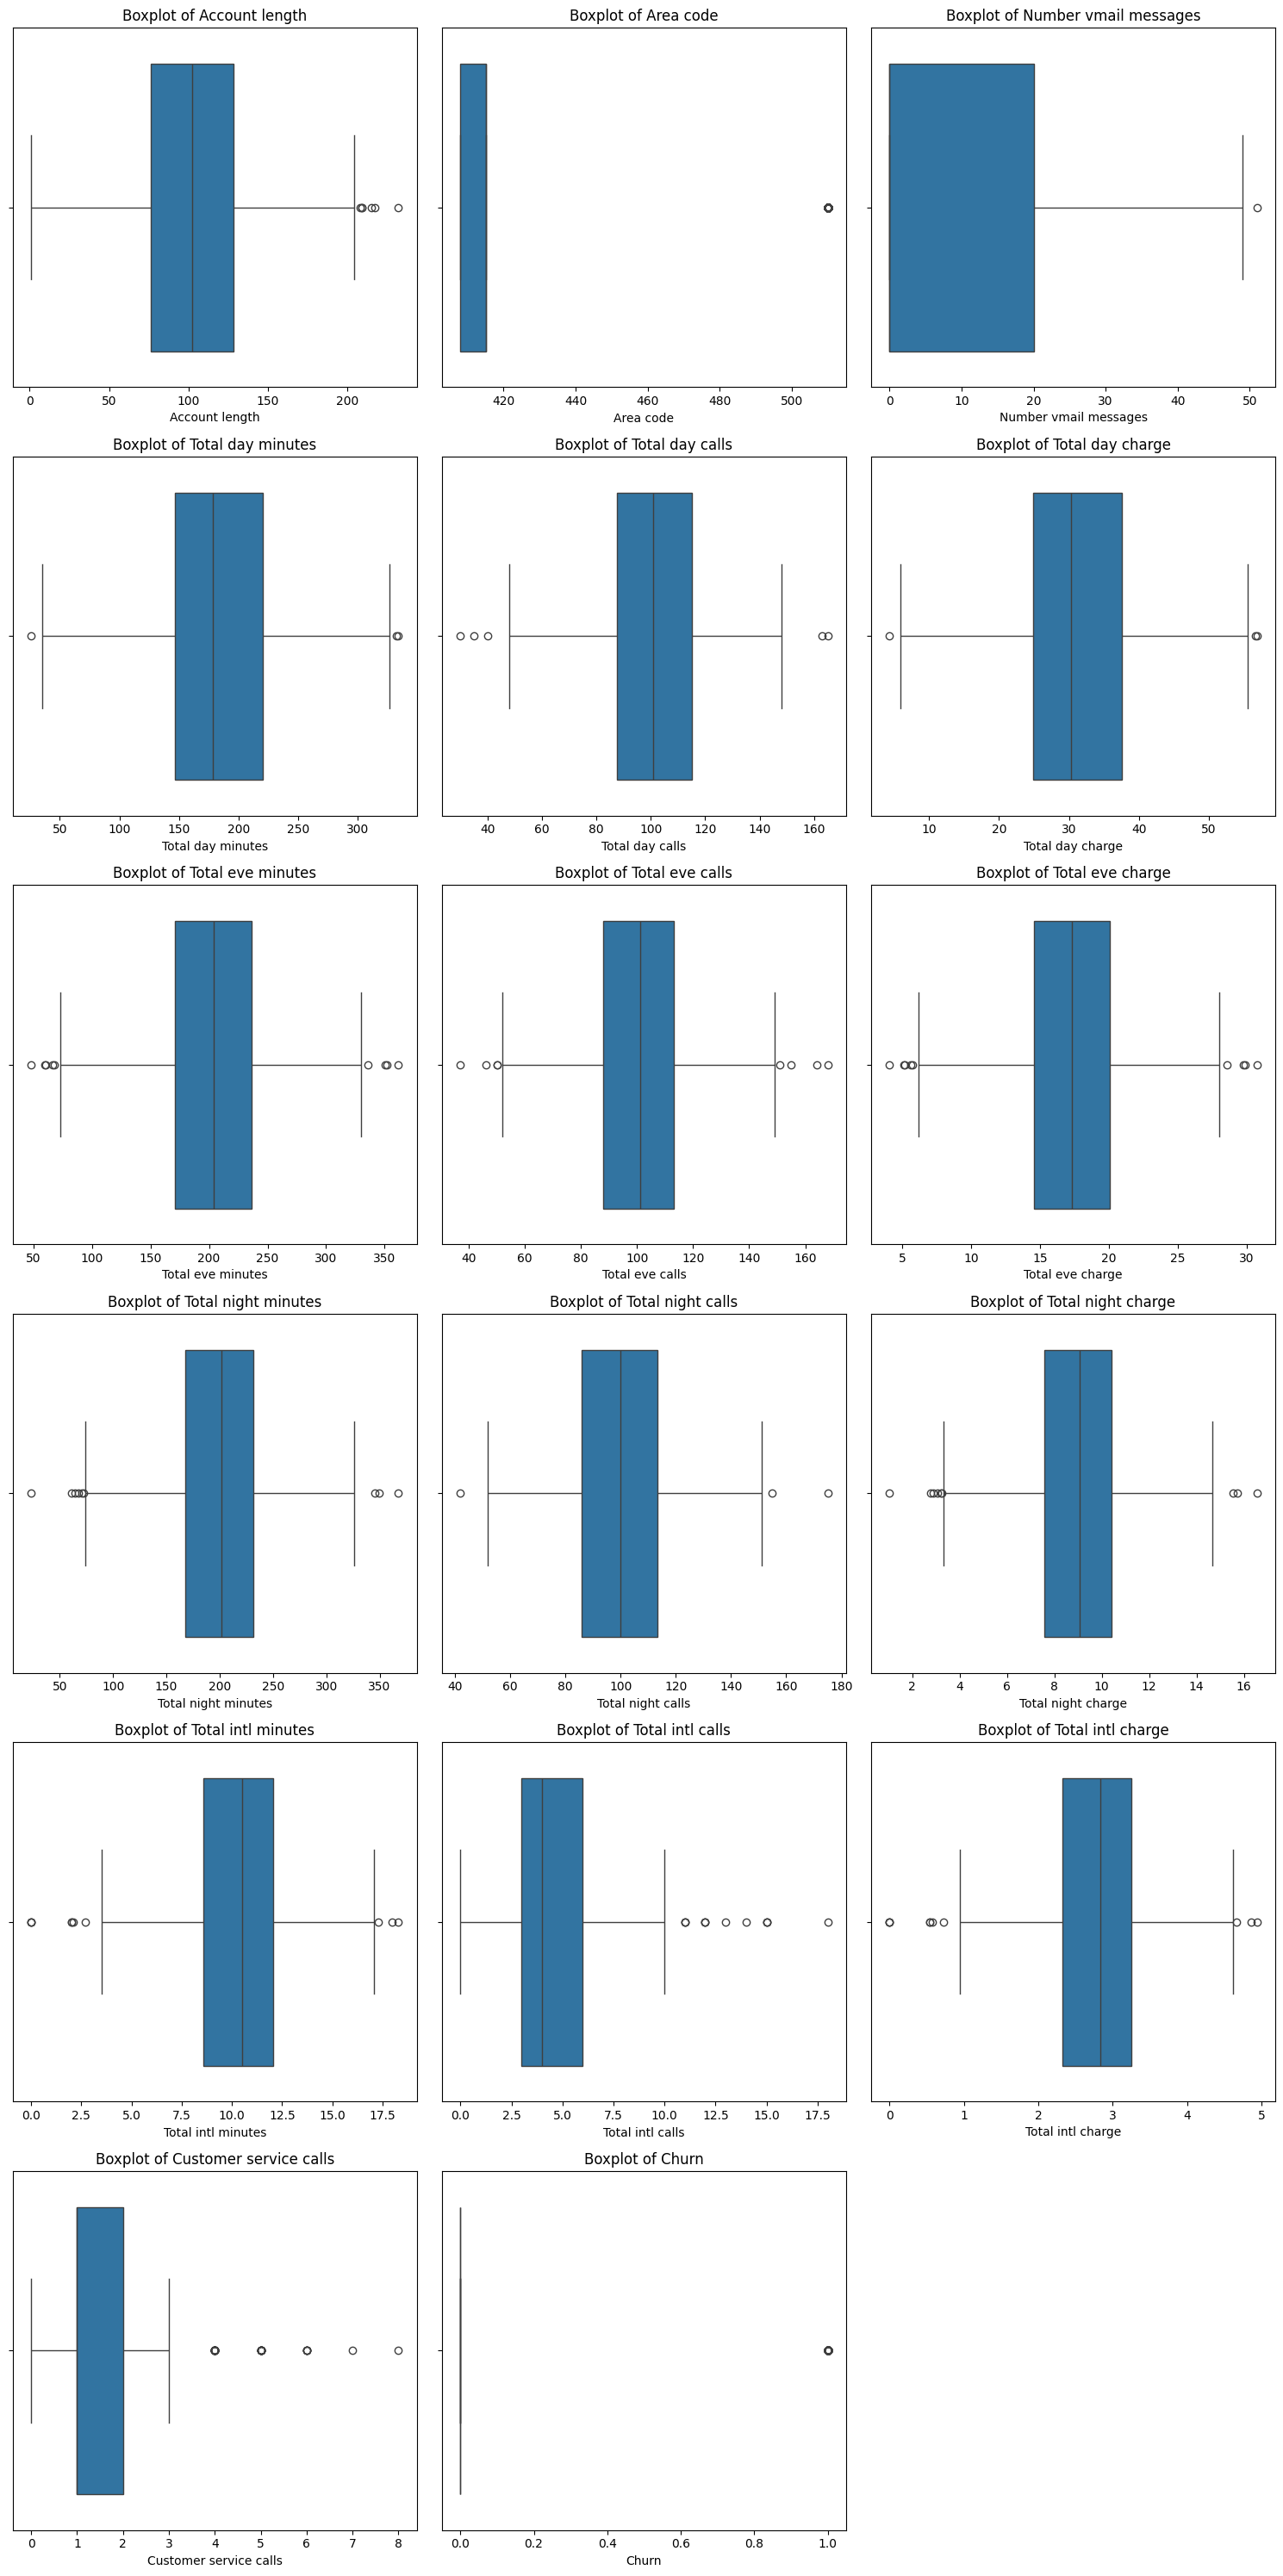

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
data =data20.select_dtypes(include=['int64','float64'])
variables = data.columns

n_rows = (len(variables) + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=data, x=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Ensemble methods These models are particularly useful in noisy data scenarios or highly complex relationships between variables 
# so we will not drop outliers

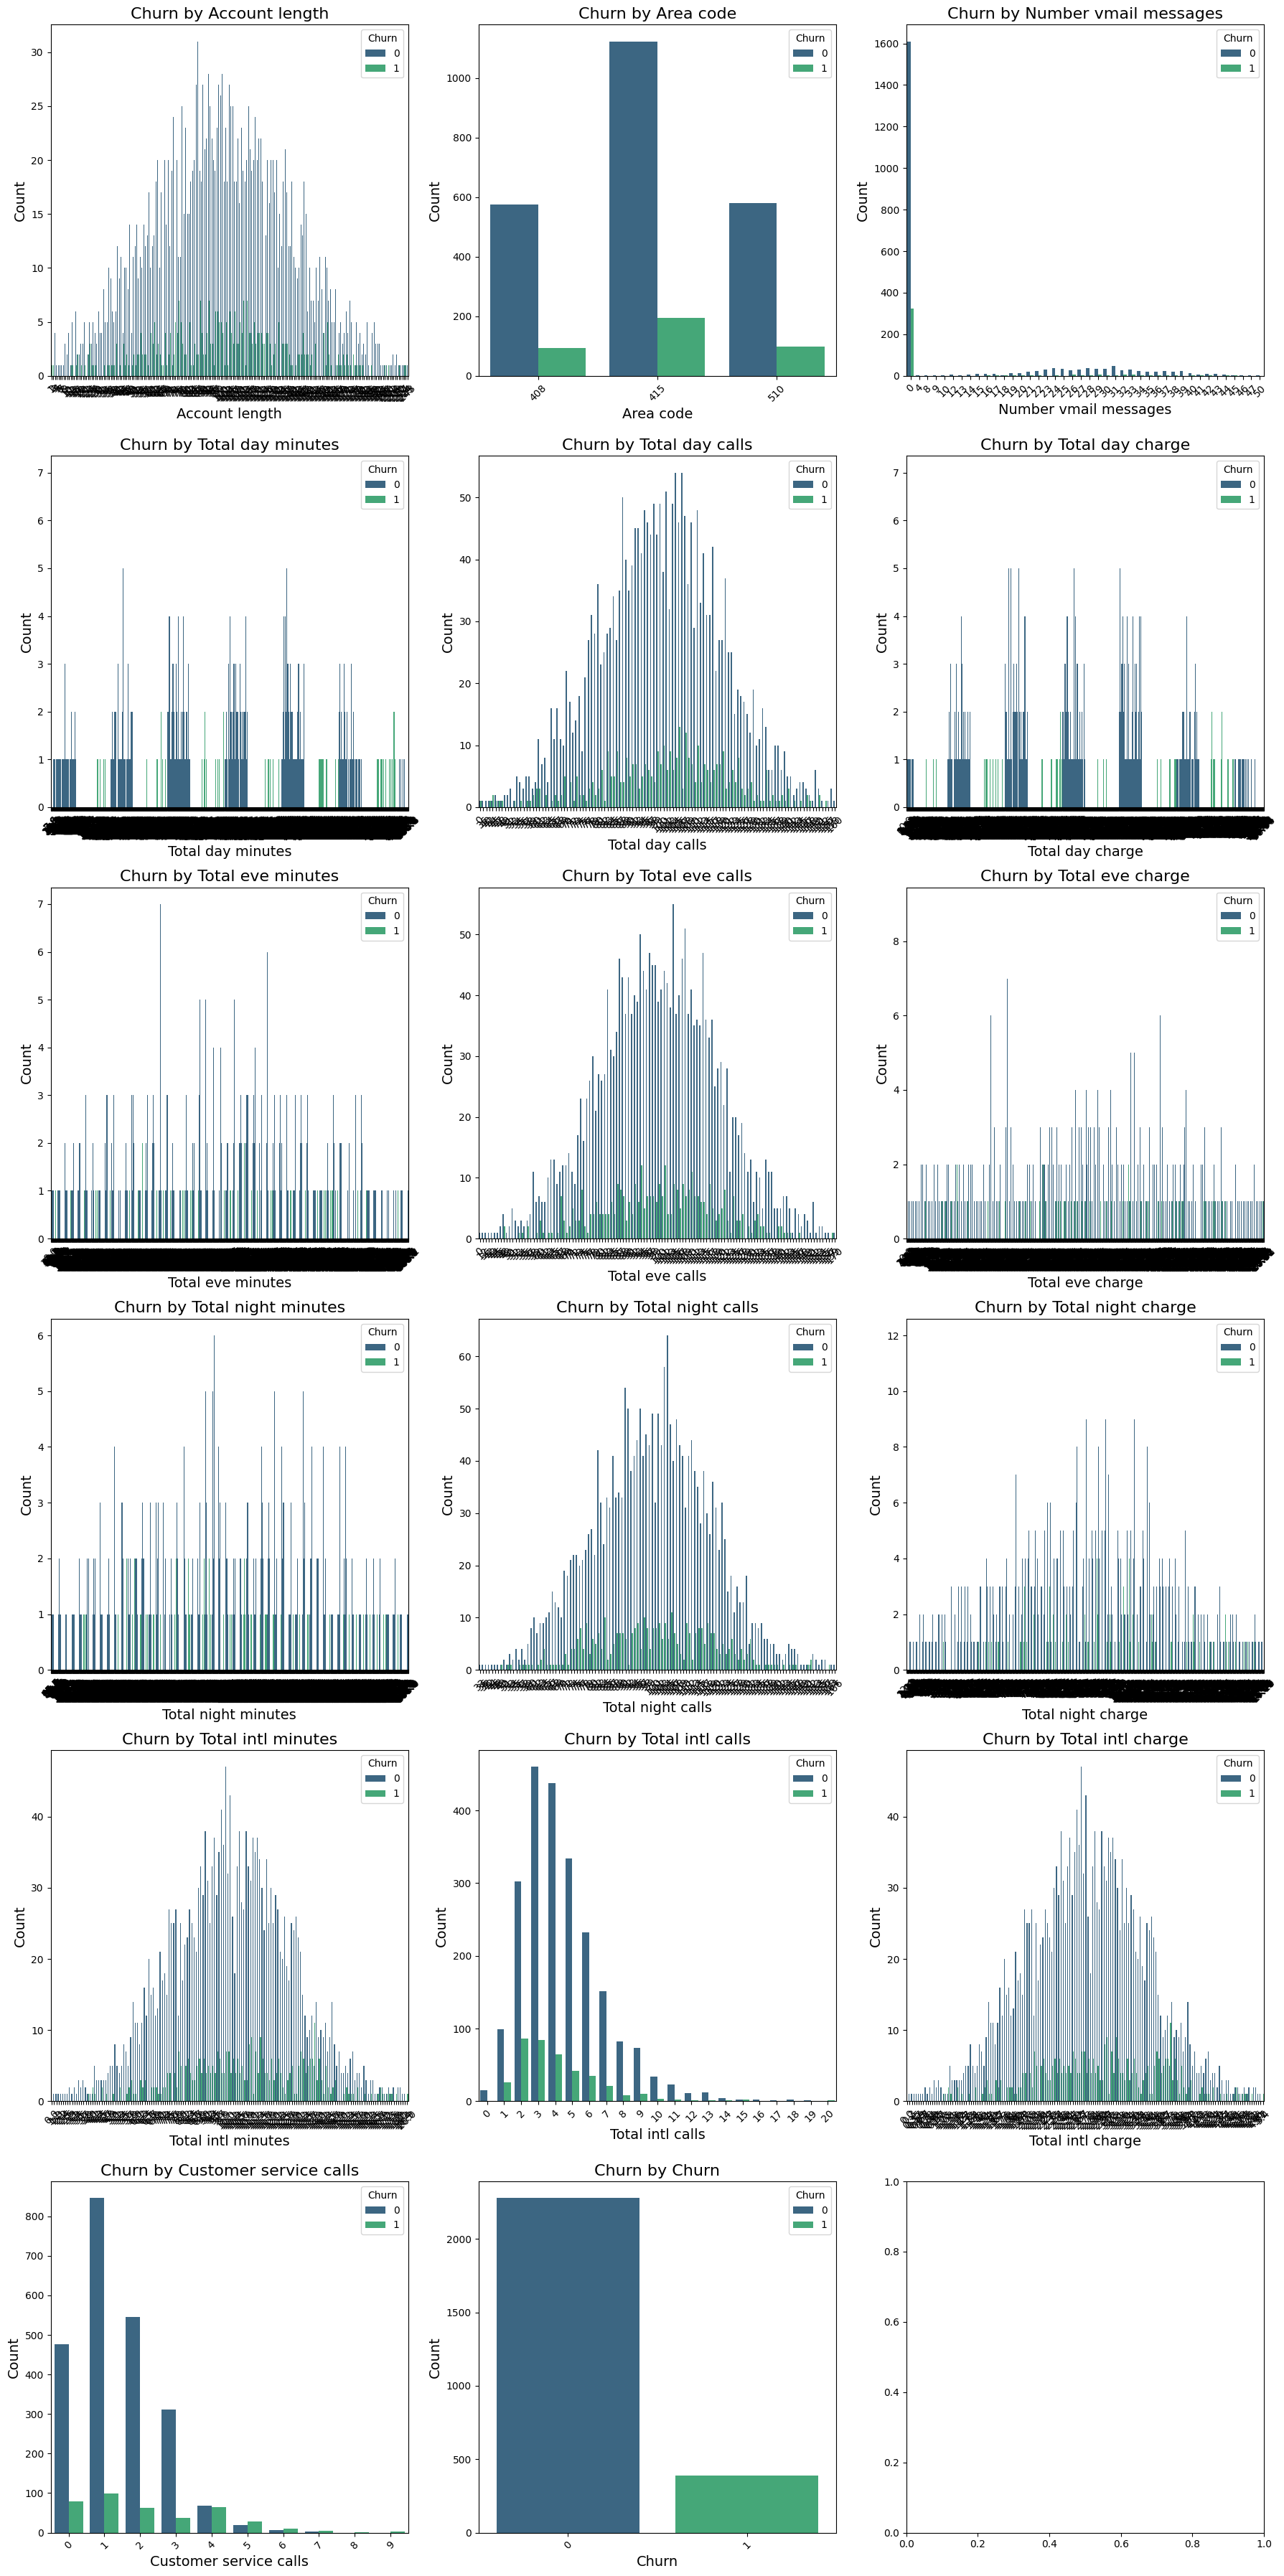

In [281]:
data =data80.select_dtypes(include=['int64','float64'])
features = data.columns
num_rows = (len(features) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 6))

for i, feature in enumerate(features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.countplot(x=feature, hue='Churn', data=data, palette='viridis', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Churn by {feature.capitalize()}', fontsize=16)
    axes[row_idx, col_idx].set_xlabel(feature.capitalize(), fontsize=14)
    axes[row_idx, col_idx].set_ylabel('Count', fontsize=14)
    axes[row_idx, col_idx].tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()

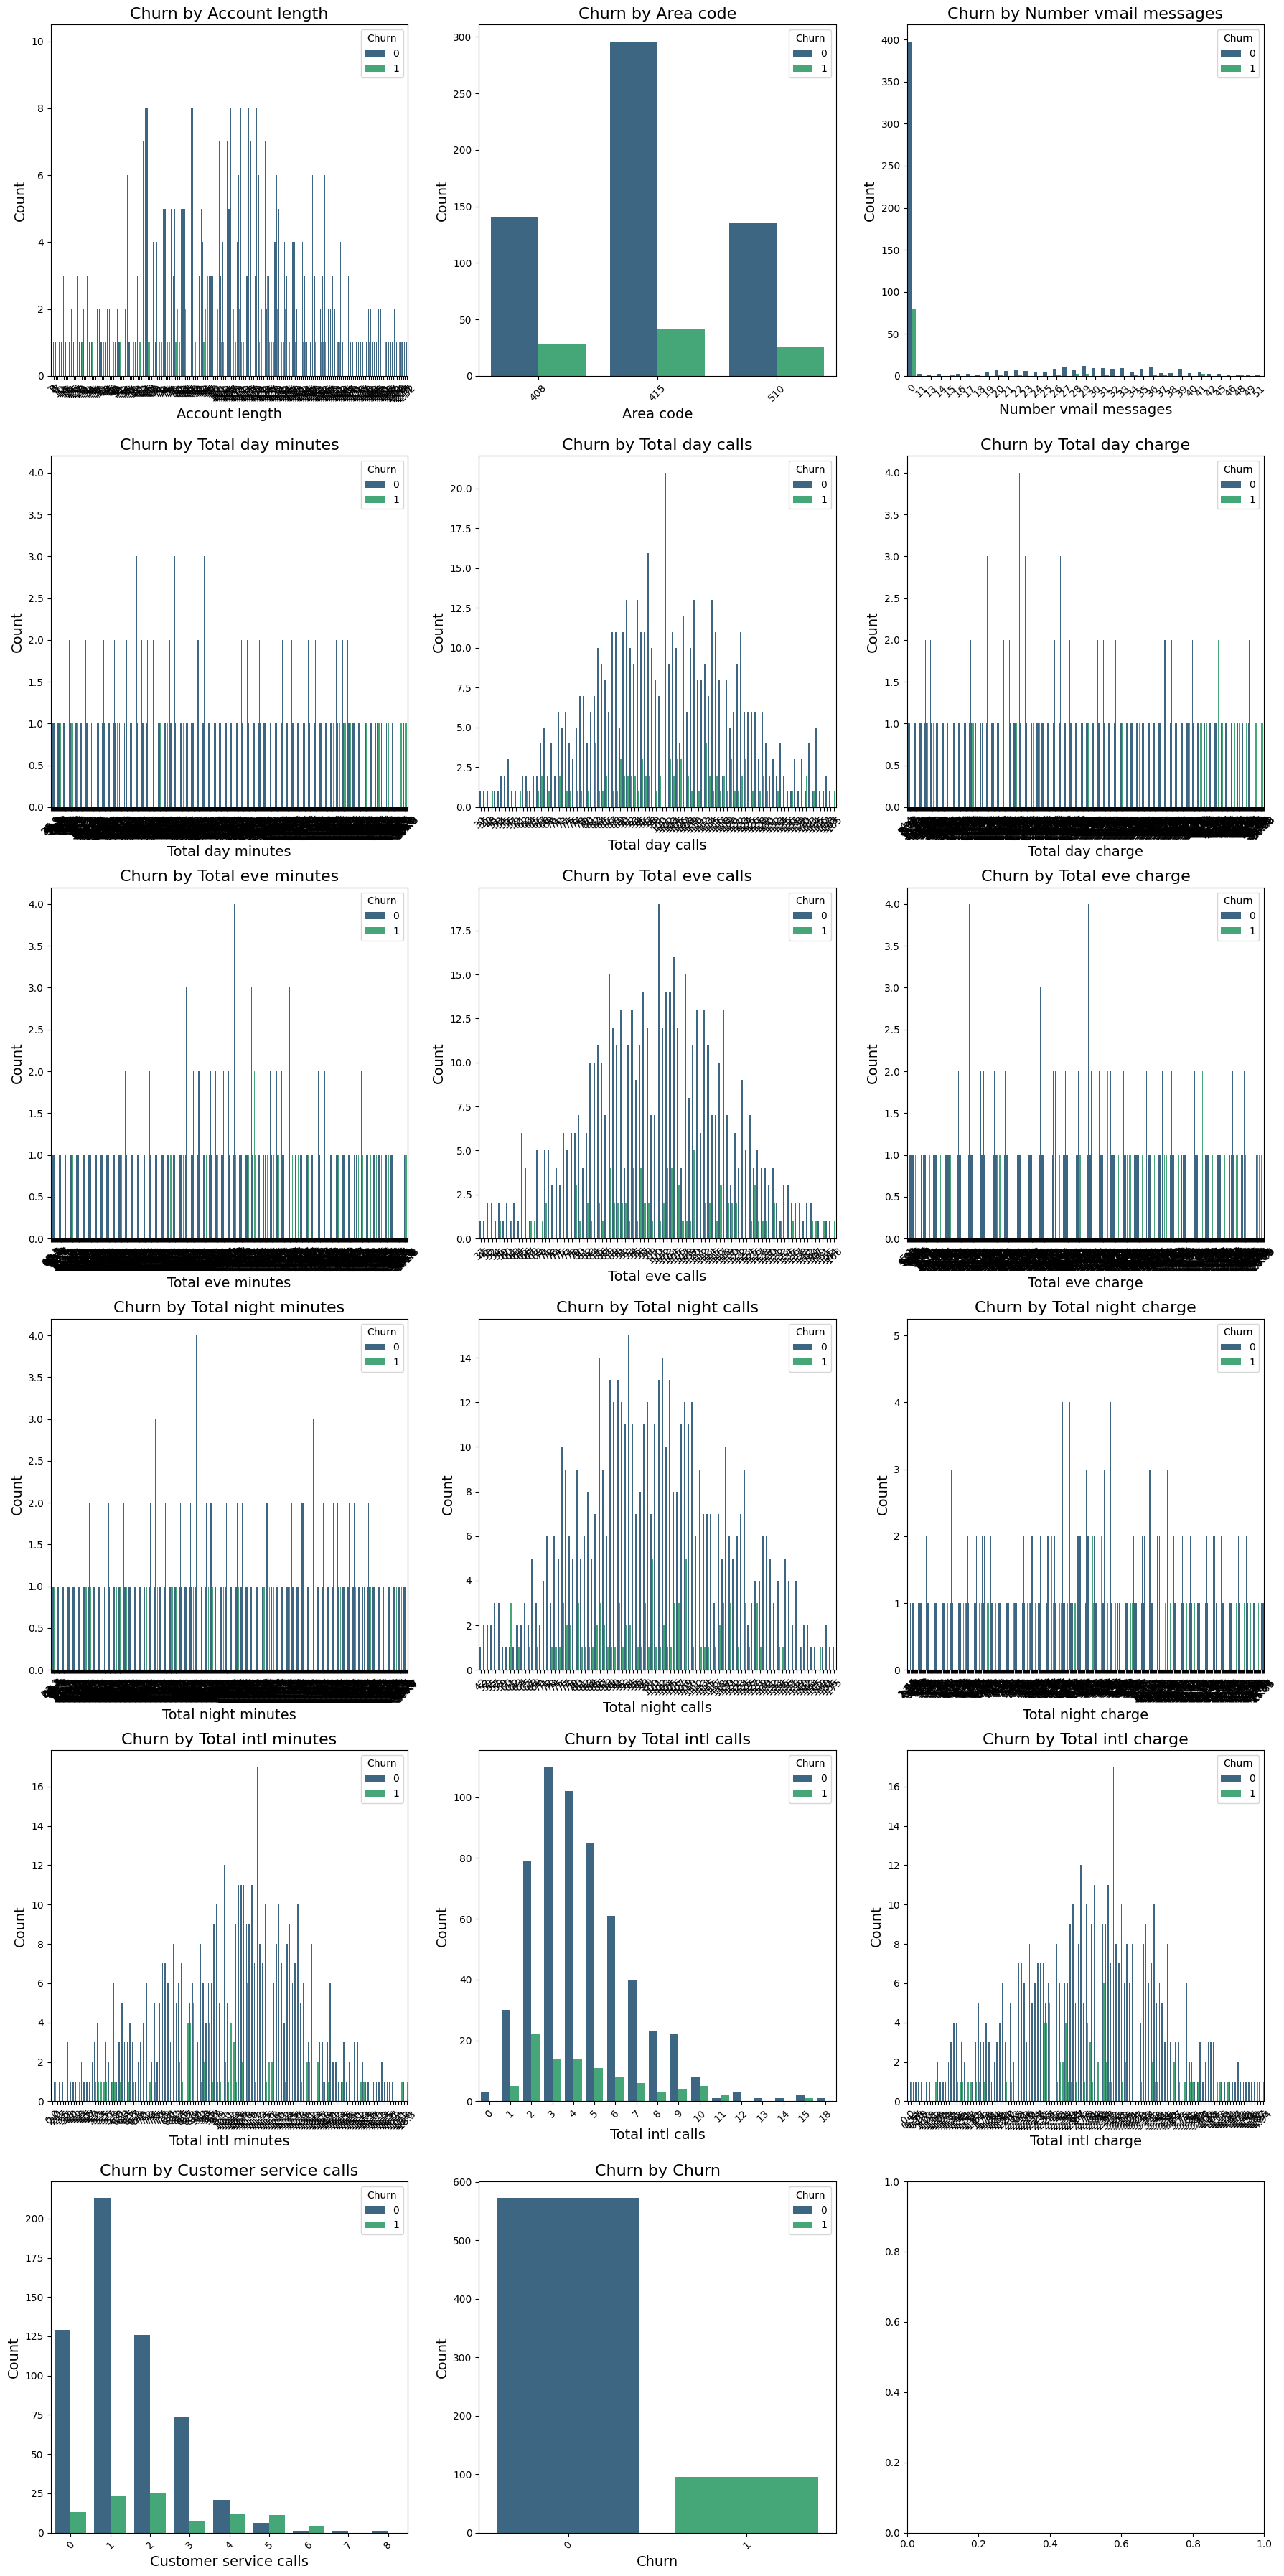

In [282]:
data =data20.select_dtypes(include=['int64','float64'])

features = data.columns
num_rows = (len(features) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 6))

for i, feature in enumerate(features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.countplot(x=feature, hue='Churn', data=data, palette='viridis', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Churn by {feature.capitalize()}', fontsize=16)
    axes[row_idx, col_idx].set_xlabel(feature.capitalize(), fontsize=14)
    axes[row_idx, col_idx].set_ylabel('Count', fontsize=14)
    axes[row_idx, col_idx].tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()

# IIIData Preparation


### we will need to concatenate data to deal with the churn unbalanced data (we will try to use smote and Enn to see their effect on our predictions)

In [283]:
concatenated_data = pd.concat([data20, data80], ignore_index=True)
concatenated_data = pd.DataFrame(concatenated_data)

In [284]:
concatenated_data

     State  Account length  Area code International plan Voice mail plan  \
0       LA             117        408                 No              No   
1       IN              65        415                 No              No   
2       NY             161        415                 No              No   
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
...    ...             ...        ...                ...             ...   
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

## Dealing with categorical data

In [285]:
data =data80.select_dtypes(include=['object'])
print(data.columns)

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')


### There is 3 columns with categorical type ['State', 'International plan', 'Voice mail plan']

In [286]:
cleaned_concatenated_data = concatenated_data
cleaned_concatenated_data['International plan'] = cleaned_concatenated_data['International plan'].apply(lambda x: 0 if x == 'No'  else 1 )
cleaned_concatenated_data['Voice mail plan'] = cleaned_concatenated_data['Voice mail plan'].apply(lambda x: 0 if x == 'No'  else 1 )
cleaned_concatenated_data = cleaned_concatenated_data.drop('State',axis=1)


In [287]:
cleaned_concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

### we have two  columns 'International plan', 'Voice mail plan' that we need to change them from categorical to binary . Otherwise state will be dropped because state have many nominal data 

# Pearson correlation matrix

<Axes: >

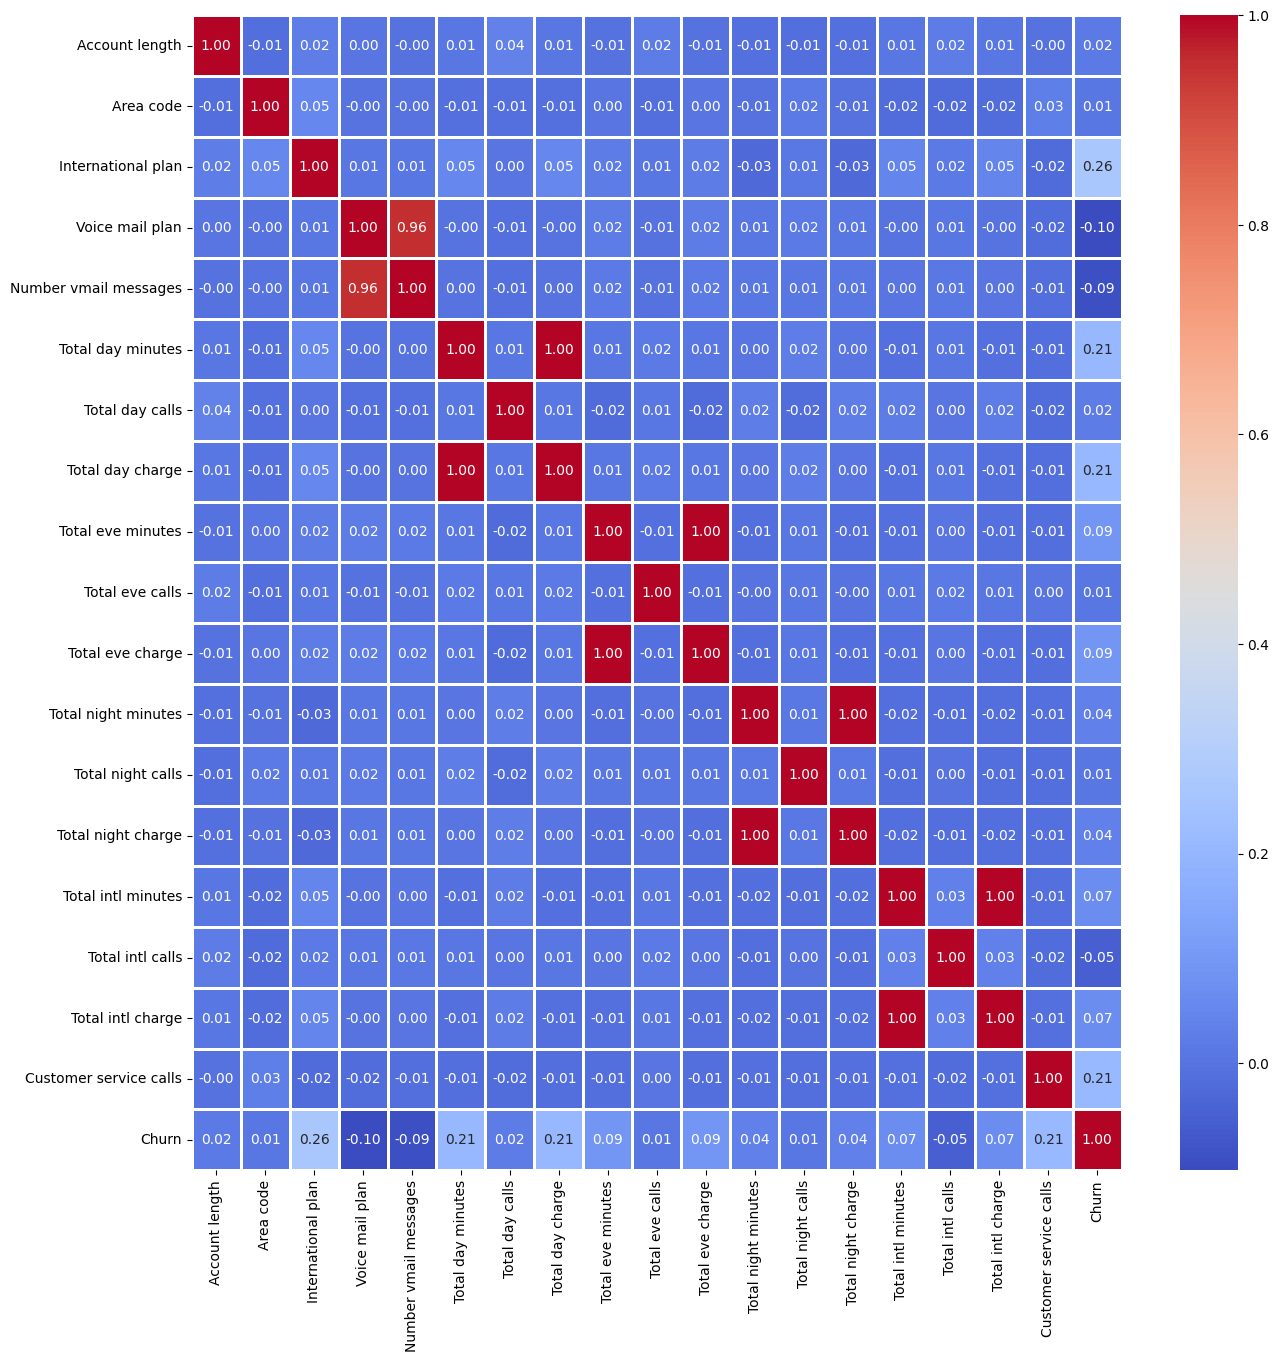

In [288]:
correlation_matrix = cleaned_concatenated_data.corr()

plt.figure(figsize=(15, 15))  
sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap="coolwarm",  
    fmt=".2f",  
    linewidths=0.8,  
    cbar=True,  
)

### As we can see we have 10 highly correlated  features so we need to drop 5 variables 

In [289]:
cleaned_concatenated_data = cleaned_concatenated_data.drop('Total day minutes',axis=1)
cleaned_concatenated_data = cleaned_concatenated_data.drop('Total eve minutes',axis=1)
cleaned_concatenated_data = cleaned_concatenated_data.drop('Total intl minutes',axis=1)
cleaned_concatenated_data = cleaned_concatenated_data.drop('Number vmail messages',axis=1)
cleaned_concatenated_data = cleaned_concatenated_data.drop('Total night minutes',axis=1)

# we will try to balance our data using smote and ENN

In [290]:
scaler = StandardScaler()
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
smote = SMOTEENN(random_state=42)

X=cleaned_concatenated_data.drop('Churn',axis=1)
Y= cleaned_concatenated_data['Churn']
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y, train_size=0.8, random_state=42)
X_smote,Y_smote = smote.fit_resample(X,Y)
X_train_smote,X_test_smote,Y_train_smote,Y_test_smote =  train_test_split(X_smote,Y_smote, train_size=0.8, random_state=42)


X_train_smote = pd.DataFrame(scaler.fit_transform(X_train_smote ))
X_test_smote  = pd.DataFrame(scaler.fit_transform(X_test_smote ))

features = cleaned_concatenated_data.drop('Churn',axis=1).columns

X_train_smote.columns = features
X_test_smote.columns = features



Percentage of True: 62.86%
Percentage of False: 37.14%


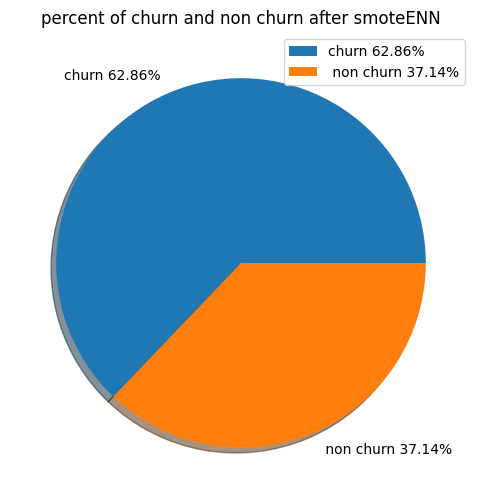

In [291]:
churn_counts = Y_smote.value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
plt.pie([churn_counts.get(1, 0),churn_counts.get(0, 0)],labels=[f"churn {churn_counts.get(1, 0):.2f}%",f" non churn {churn_counts.get(0, 0):.2f}%"],shadow = True)
plt.legend()
plt.title('percent of churn and non churn after smoteENN')
print(f"Percentage of True: {churn_counts.get(1, 0):.2f}%")
print(f"Percentage of False: {churn_counts.get(0, 0):.2f}%")

# PCA 



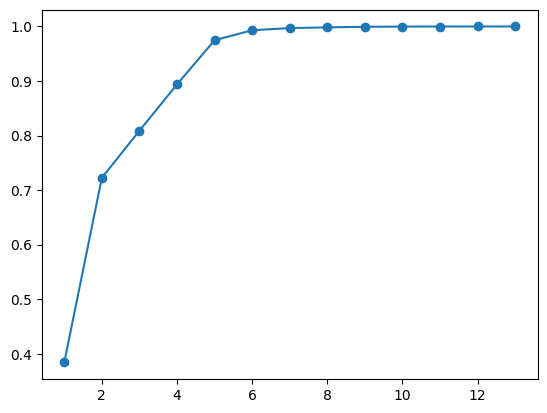

In [292]:
wss = []
pca_data = cleaned_concatenated_data[cleaned_concatenated_data['Churn'] == 1]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_data)
explained_variance_ratio = []
for i in range(1,len(cleaned_concatenated_data.columns)):
    pca = PCA(n_components=i)
    pca.fit(cleaned_concatenated_data)
    explained_variance_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.plot(range(1,14),explained_variance_ratio,marker='o')

# This code isolates churned individuals (Churn == 1), scales their features, and uses PCA to plot cumulative explained variance, identifying the optimal components before applying KMeans clustering

c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


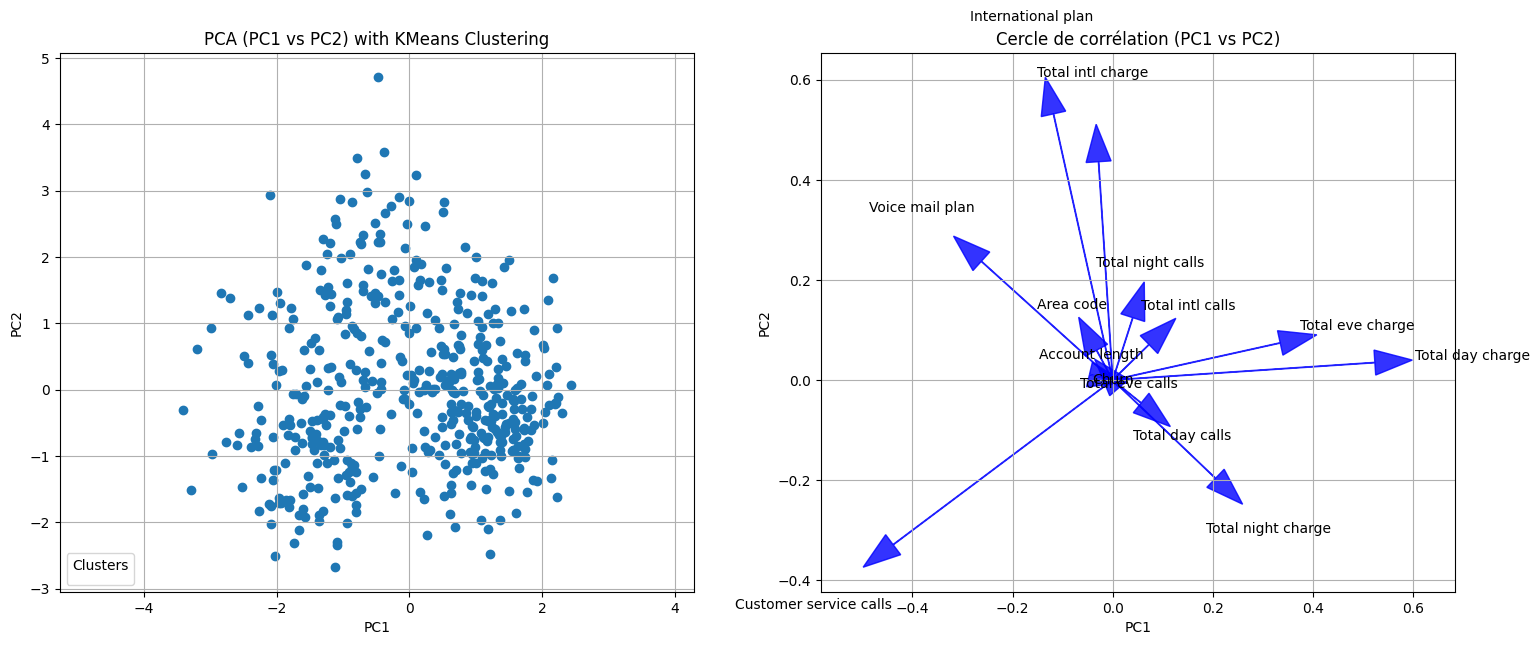

In [293]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pcs = pca.components_

############################################### PC1 vs PC2 #######################################
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot for PC1 vs PC2
scatter = axes[0].scatter(
    pca_df['PC1'], pca_df['PC2'], 
)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_title("PCA (PC1 vs PC2) with KMeans Clustering")
axes[0].legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='datalim')

# Correlation circle for PC1 vs PC2
for i, feature in enumerate(pca_data.columns):
    axes[1].arrow(0, 0, pcs[0, i], pcs[1, i], color='blue', alpha=0.8, head_width=0.05, length_includes_head=True)
    axes[1].text(pcs[0, i] * 1.2, pcs[1, i] * 1.2, feature, color='black', fontsize=10, ha='center', va='center')

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_title("Cercle de corrélation (PC1 vs PC2)")
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='datalim')






# IV.Modeling

In [294]:
paper1_models = {'modelname':[],'model':[],'accuracy':[],'precision':[],'recall':[],'f1score':[],'roc':[],'pr-score':[],'preds':[]}
#variables we will need in modeling just to put data in them 
table4 = {'modelname':[],'model':[],'accuracy':[],'precision':[],'recall':[],'f1score':[],'roc':[],'pr-score':[]}
results = {}
hyperparm = {
    'svc':"",
    'lr':"",
    'gbm':"",
    'rfc':"",
    'ada':"",
    'xgb':""
}

# First data science objectif :Implementing machine learning techniques for customer retention and churn prediction


#  Clustering

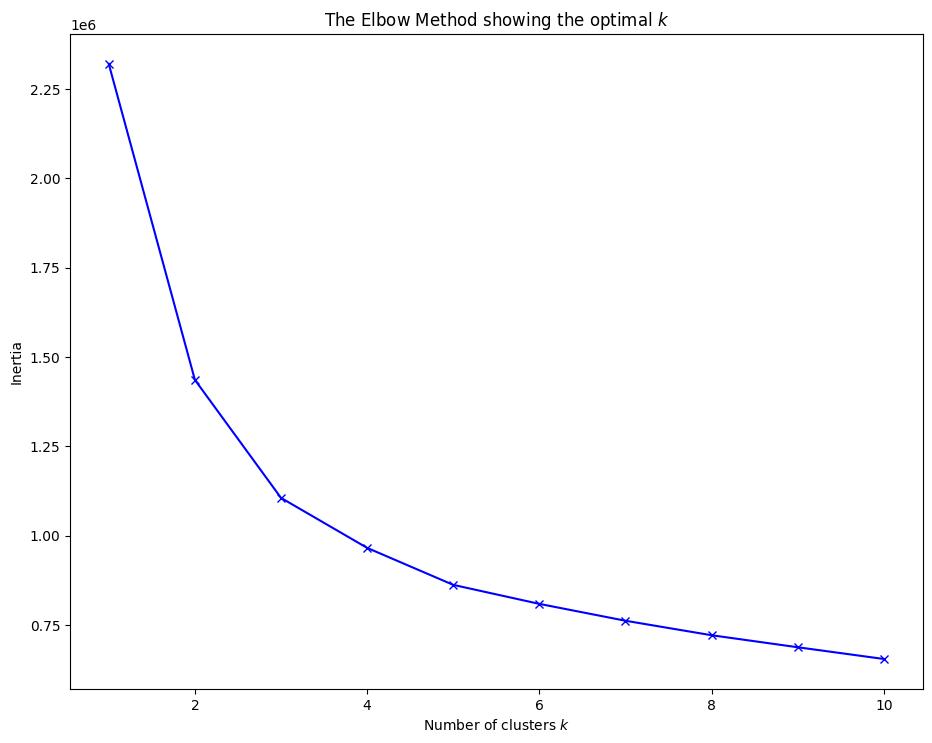

<Figure size 640x480 with 0 Axes>

In [295]:

for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(pca_data)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()
plt.tight_layout()
plt.show()

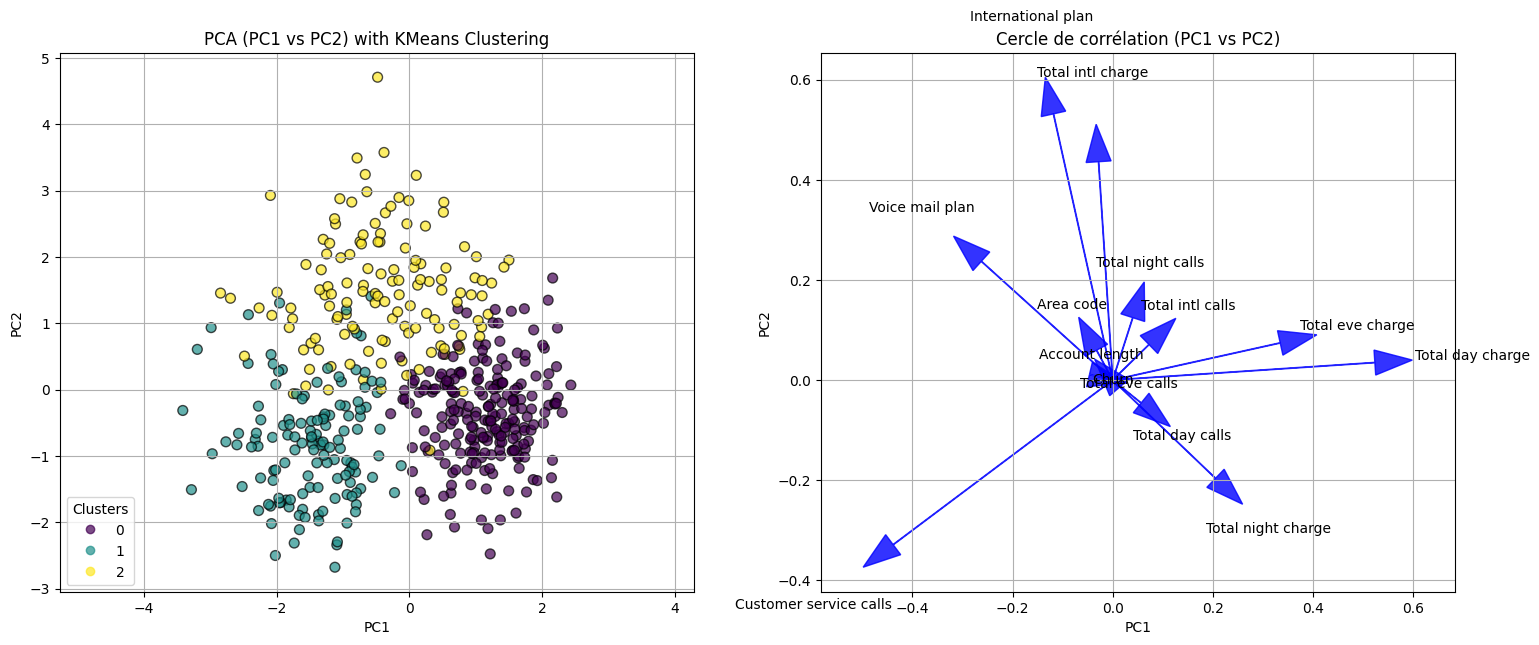

In [296]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pcs = pca.components_

from sklearn.cluster import KMeans

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_labels

# Define colors for clusters
cluster_colors = ['red', 'green', 'blue']
labels = kmeans.labels_

############################################### PC1 vs PC2 #######################################
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot for PC1 vs PC2
scatter = axes[0].scatter(
    pca_df['PC1'], pca_df['PC2'], 
    c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7, edgecolor='k'
)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_title("PCA (PC1 vs PC2) with KMeans Clustering")
axes[0].legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='datalim')

# Correlation circle for PC1 vs PC2
for i, feature in enumerate(pca_data.columns):
    axes[1].arrow(0, 0, pcs[0, i], pcs[1, i], color='blue', alpha=0.8, head_width=0.05, length_includes_head=True)
    axes[1].text(pcs[0, i] * 1.2, pcs[1, i] * 1.2, feature, color='black', fontsize=10, ha='center', va='center')

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_title("Cercle de corrélation (PC1 vs PC2)")
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='datalim')






# from the previous pca and the elbow method we can see that we can devie our churned customer into 3 cluster 
### cluster 1 : describe better with Customer service call
### cluster 2 : describe better with international plan /total int charge
### cluster 3 : describe better with total day charge

# Svc implementation

In [297]:
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

svc_down = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(kernel='linear', probability=True))
])



svc_down.fit(X_train, Y_train)


SVC_y_preds = svc_down.predict(X_test)
validation_accuracy = accuracy_score(Y_test, SVC_y_preds)
print("Validation Accuracy:", validation_accuracy)
svc_accuracy = accuracy_score(Y_test, SVC_y_preds)
svc_precision = precision_score(Y_test, SVC_y_preds)
svc_recall = recall_score(Y_test, SVC_y_preds)
svc_f1score = f1_score(Y_test, SVC_y_preds)
svc_roc_auc = roc_auc_score(Y_test, SVC_y_preds)
svc_pr_auc = average_precision_score(Y_test, SVC_y_preds)
paper1_models['modelname'].append('SVC')
paper1_models['model'].append(svc_down)
paper1_models['accuracy'].append(svc_accuracy)
paper1_models['precision'].append(svc_precision)
paper1_models['recall'].append(svc_recall)
paper1_models['f1score'].append(svc_f1score)
paper1_models['roc'].append(svc_roc_auc)
paper1_models['pr-score'].append(svc_pr_auc)
paper1_models['preds'].append(svc_pr_auc)
 
print(classification_report(Y_test,SVC_y_preds))




Validation Accuracy: 0.856071964017991
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       571
           1       0.00      0.00      0.00        96

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.86      0.79       667



c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\h3ch\Desktop\D\paper3

# Gradient Boost

In [298]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

gbc = GradientBoostingClassifier()

gbc.fit(X_train, Y_train)

gbc_y_preds = gbc.predict(X_test)
validation_accuracy = accuracy_score(Y_test, gbc_y_preds)
print("Validation Accuracy:", validation_accuracy)
gbc_accuracy = accuracy_score(Y_test, gbc_y_preds)
gbc_precision = precision_score(Y_test, gbc_y_preds)
gbc_recall = recall_score(Y_test, gbc_y_preds)
gbc_f1score = f1_score(Y_test, gbc_y_preds)
gbc_roc_auc = roc_auc_score(Y_test, gbc_y_preds)
gbc_pr_auc = average_precision_score(Y_test, gbc_y_preds)
paper1_models['modelname'].append('GradientBoosting')
paper1_models['model'].append(gbc)
paper1_models['accuracy'].append(gbc_accuracy)
paper1_models['precision'].append(gbc_precision)
paper1_models['recall'].append(gbc_recall)
paper1_models['f1score'].append(gbc_f1score)
paper1_models['roc'].append(gbc_roc_auc)
paper1_models['pr-score'].append(gbc_pr_auc)
paper1_models['preds'].append(gbc_y_preds)



print(classification_report(Y_test,gbc_y_preds))




Validation Accuracy: 0.9475262368815592
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       571
           1       0.89      0.73      0.80        96

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.88       667
weighted avg       0.95      0.95      0.95       667



# logistic regression

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

logreg_y_preds = logreg.predict(X_test)
validation_accuracy = accuracy_score(Y_test, logreg_y_preds)
print("Validation Accuracy:", validation_accuracy)
logreg_accuracy = accuracy_score(Y_test, logreg_y_preds)
logreg_precision = precision_score(Y_test, logreg_y_preds)
logreg_recall = recall_score(Y_test, logreg_y_preds)
logreg_f1score = f1_score(Y_test, logreg_y_preds)
logreg_roc_auc = roc_auc_score(Y_test, logreg_y_preds)
logreg_pr_auc = average_precision_score(Y_test, logreg_y_preds)
paper1_models['modelname'].append('LogisticRegression')
paper1_models['model'].append(logreg)
paper1_models['accuracy'].append(logreg_accuracy)
paper1_models['precision'].append(logreg_precision)
paper1_models['recall'].append(logreg_recall)
paper1_models['f1score'].append(logreg_f1score)
paper1_models['roc'].append(logreg_roc_auc)
paper1_models['pr-score'].append(logreg_pr_auc)
paper1_models['preds'].append(logreg_y_preds)



print(classification_report(Y_test,logreg_y_preds))



Validation Accuracy: 0.8515742128935532
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       571
           1       0.41      0.07      0.12        96

    accuracy                           0.85       667
   macro avg       0.64      0.53      0.52       667
weighted avg       0.80      0.85      0.80       667



c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random forest 

In [300]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

rf_y_preds = rf.predict(X_test)
validation_accuracy = accuracy_score(Y_test, rf_y_preds)
print("Validation Accuracy:", validation_accuracy)
rf_accuracy = accuracy_score(Y_test, rf_y_preds)
rf_precision = precision_score(Y_test, rf_y_preds)
rf_recall = recall_score(Y_test, rf_y_preds)
rf_f1score = f1_score(Y_test, rf_y_preds)
rf_roc_auc = roc_auc_score(Y_test, rf_y_preds)
rf_pr_auc = average_precision_score(Y_test, rf_y_preds)
paper1_models['modelname'].append('RandomForest')
paper1_models['model'].append(rf)
paper1_models['accuracy'].append(rf_accuracy)
paper1_models['precision'].append(rf_precision)
paper1_models['recall'].append(rf_recall)
paper1_models['f1score'].append(rf_f1score)
paper1_models['roc'].append(rf_roc_auc)
paper1_models['pr-score'].append(rf_pr_auc)
paper1_models['preds'].append(rf_y_preds)

print(classification_report(Y_test,rf_y_preds))


Validation Accuracy: 0.9430284857571214
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       571
           1       0.91      0.67      0.77        96

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



# implementing descion tree 

In [301]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2)
dt.fit(X_train, Y_train)

dt_y_preds = dt.predict(X_test)

validation_accuracy = accuracy_score(Y_test, dt_y_preds)
print("Validation Accuracy:", validation_accuracy)
dt_accuracy = accuracy_score(Y_test, dt_y_preds)
dt_precision = precision_score(Y_test, dt_y_preds)
dt_recall = recall_score(Y_test, dt_y_preds)
dt_f1score = f1_score(Y_test, dt_y_preds)
dt_roc_auc = roc_auc_score(Y_test, dt_y_preds)
dt_pr_auc = average_precision_score(Y_test, dt_y_preds)

# Append metrics to the model summary
paper1_models['modelname'].append('DecisionTree')
paper1_models['model'].append(dt)
paper1_models['accuracy'].append(dt_accuracy)
paper1_models['precision'].append(dt_precision)
paper1_models['recall'].append(dt_recall)
paper1_models['f1score'].append(dt_f1score)
paper1_models['roc'].append(dt_roc_auc)
paper1_models['pr-score'].append(dt_pr_auc)
paper1_models['preds'].append(dt_y_preds)

print(classification_report(Y_test,dt_y_preds))






Validation Accuracy: 0.9325337331334332
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       571
           1       0.81      0.70      0.75        96

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667



# Adaboost 

In [302]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

adaboost = AdaBoostClassifier()

adaboost.fit(X_train, Y_train)

adaboost_y_preds = adaboost.predict(X_test)
validation_accuracy = accuracy_score(Y_test, adaboost_y_preds)
print("Validation Accuracy:", validation_accuracy)
adaboost_accuracy = accuracy_score(Y_test, adaboost_y_preds)
adaboost_precision = precision_score(Y_test, adaboost_y_preds)
adaboost_recall = recall_score(Y_test, adaboost_y_preds)
adaboost_f1score = f1_score(Y_test, adaboost_y_preds)
adaboost_roc_auc = roc_auc_score(Y_test, adaboost_y_preds)
adaboost_pr_auc = average_precision_score(Y_test, adaboost_y_preds)
paper1_models['modelname'].append('AdaBoost')
paper1_models['model'].append(adaboost)
paper1_models['accuracy'].append(adaboost_accuracy)
paper1_models['precision'].append(adaboost_precision)
paper1_models['recall'].append(adaboost_recall)
paper1_models['f1score'].append(adaboost_f1score)
paper1_models['roc'].append(adaboost_roc_auc)
paper1_models['pr-score'].append(adaboost_pr_auc)
paper1_models['preds'].append(adaboost_y_preds)

print(classification_report(Y_test,adaboost_y_preds))


Validation Accuracy: 0.8725637181409296
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       571
           1       0.60      0.35      0.44        96

    accuracy                           0.87       667
   macro avg       0.75      0.66      0.69       667
weighted avg       0.85      0.87      0.86       667



c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Xgboost 

In [303]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

xgb = XGBClassifier()

xgb.fit(X_train, Y_train)

xgb_y_preds = xgb.predict(X_test)
validation_accuracy = accuracy_score(Y_test, xgb_y_preds)
print("Validation Accuracy:", validation_accuracy)
xgb_accuracy = accuracy_score(Y_test, xgb_y_preds)
xgb_precision = precision_score(Y_test, xgb_y_preds)
xgb_recall = recall_score(Y_test, xgb_y_preds)
xgb_f1score = f1_score(Y_test, xgb_y_preds)
xgb_roc_auc = roc_auc_score(Y_test, xgb_y_preds)
xgb_pr_auc = average_precision_score(Y_test, xgb_y_preds)
paper1_models['modelname'].append('XGBoost')
paper1_models['model'].append(xgb)
paper1_models['accuracy'].append(xgb_accuracy)
paper1_models['precision'].append(xgb_precision)
paper1_models['recall'].append(xgb_recall)
paper1_models['f1score'].append(xgb_f1score)
paper1_models['roc'].append(xgb_roc_auc)
paper1_models['pr-score'].append(xgb_pr_auc)
paper1_models['preds'].append(xgb_y_preds)


print(classification_report(Y_test,xgb_y_preds))




Validation Accuracy: 0.9610194902548725
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       571
           1       0.94      0.78      0.85        96

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



# ANN

In [304]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

ann = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)

ann_y_preds = (ann.predict(X_test) > 0.5).astype(int)
validation_accuracy = accuracy_score(Y_test, ann_y_preds)
print("Validation Accuracy:", validation_accuracy)
ann_accuracy = accuracy_score(Y_test, ann_y_preds)
ann_precision = precision_score(Y_test, ann_y_preds)
ann_recall = recall_score(Y_test, ann_y_preds)
ann_f1score = f1_score(Y_test, ann_y_preds)
ann_roc_auc = roc_auc_score(Y_test, ann_y_preds)
ann_pr_auc = average_precision_score(Y_test, ann_y_preds)
paper1_models['modelname'].append('ANN')
paper1_models['model'].append(ann)
paper1_models['accuracy'].append(ann_accuracy)
paper1_models['precision'].append(ann_precision)
paper1_models['recall'].append(ann_recall)
paper1_models['f1score'].append(ann_f1score)
paper1_models['roc'].append(ann_roc_auc)
paper1_models['pr-score'].append(ann_pr_auc)
paper1_models['preds'].append(ann_y_preds)



print(classification_report(Y_test,ann_y_preds))


c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation Accuracy: 0.8770614692653673
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       571
           1       0.82      0.19      0.31        96

    accuracy                           0.88       667
   macro avg       0.85      0.59      0.62       667
weighted avg       0.87      0.88      0.84       667



#  second datascience objectif : Explaining customer churn prediction in telecom industry using tabular machine learning models


# grid search for svc can see result in comment 

In [305]:
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc = SVC()


param_grid = {
    'C': np.logspace(np.log10(0.001641949), np.log10(464.0812108), 20)   
}

grid_search = GridSearchCV(estimator=svc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

SVC_y_preds = best_model.predict(X_test)
validation_accuracy = accuracy_score(Y_test, SVC_y_preds)
print("Validation Accuracy:", validation_accuracy)
svc_accuracy = accuracy_score(Y_test, SVC_y_preds)
svc_precision = precision_score(Y_test, SVC_y_preds)
svc_recall = recall_score(Y_test, SVC_y_preds)
svc_f1score = f1_score(Y_test, SVC_y_preds)
svc_roc_auc = roc_auc_score(Y_test, SVC_y_preds)
svc_pr_auc = average_precision_score(Y_test, SVC_y_preds)
table4['modelname'].append('SVC')
table4['model'].append(best_model)
table4['accuracy'].append(svc_accuracy)
table4['precision'].append(svc_precision)
table4['recall'].append(svc_recall)
table4['f1score'].append(svc_f1score)
table4['roc'].append(svc_roc_auc)
table4['pr-score'].append(svc_pr_auc)
hyperparm['svc'] = grid_search.best_estimator_





Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': np.float64(0.0016419490000000006)}
Best Cross-Validation Score 0.8548386688150468
Validation Accuracy: 0.856071964017991


c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# grid search for GradientBoostingClassifier u can see result in comment 

In [306]:

from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()




param_grid = {
    'max_leaf_nodes': range(3, 8),
    'min_samples_leaf': range(5, 11),
    'max_depth': [3, 10,15,20,25,29],

}

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
gradien_model = best_model

GBM_y_pred = best_model.predict(X_test)
validation_accuracy = accuracy_score(Y_test, GBM_y_pred)
print("Validation Accuracy:", validation_accuracy)

accuracy = accuracy_score(Y_test, GBM_y_pred )
precision = precision_score(Y_test, GBM_y_pred )
recall = recall_score(Y_test, GBM_y_pred )
f1score = f1_score(Y_test, GBM_y_pred )
roc_auc = roc_auc_score(Y_test, GBM_y_pred )
pr_auc = average_precision_score(Y_test, GBM_y_pred )



table4['modelname'].append('GradientBoostingClassifier')
table4['model'].append(best_model)
table4['accuracy'].append(accuracy)
table4['precision'].append(precision)
table4['recall'].append(recall)
table4['f1score'].append(f1score)
table4['roc'].append(roc_auc)
table4['pr-score'].append(pr_auc)

hyperparm['gbm'] = grid_search.best_estimator_

print(classification_report(Y_test, GBM_y_pred))

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 7}
Best Cross-Validation Accuracy: 0.9523644848447997
Validation Accuracy: 0.952023988005997
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       571
           1       0.92      0.73      0.81        96

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



# logistic regression grid search for GradientBoostingClassifier u can see result in comment 

In [307]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()


param_grid = {
    'C': np.logspace(-5, 5, 20) 
}

grid_search = GridSearchCV(estimator=clf,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

LR_y_pred = best_model.predict(X_test)
validation_accuracy = accuracy_score(Y_test, LR_y_pred)
print("Validation Accuracy:", validation_accuracy)

accuracy = accuracy_score(Y_test, LR_y_pred)
precision = precision_score(Y_test, LR_y_pred)
recall = recall_score(Y_test, LR_y_pred)
f1score = f1_score(Y_test, LR_y_pred)
roc_auc = roc_auc_score(Y_test, LR_y_pred)  
pr_auc = average_precision_score(Y_test, LR_y_pred)  



table4['modelname'].append('LogisticRegression')
table4['model'].append(best_model)
table4['accuracy'].append(accuracy)
table4['precision'].append(precision)
table4['recall'].append(recall)
table4['f1score'].append(f1score)
table4['roc'].append(roc_auc)
table4['pr-score'].append(pr_auc)

hyperparm['lr'] = grid_search.best_estimator_


print(classification_report(Y_test, LR_y_pred))





Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': np.float64(8858.667904100832)}
Best Cross-Validation Score 0.8597134817607258
Validation Accuracy: 0.8530734632683659
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       571
           1       0.33      0.02      0.04        96

    accuracy                           0.85       667
   macro avg       0.60      0.51      0.48       667
weighted avg       0.78      0.85      0.79       667



c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# random forest grid search  u can see result in comment 

In [308]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()


param_grid = {
    'max_depth' : range(9,21),
    'n_estimators': range(14,20)
}

grid_search = GridSearchCV(estimator=rfc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

RFC_y_pred = best_model.predict(X_test)
validation_accuracy = accuracy_score(Y_test, RFC_y_pred)
print("Validation Accuracy:", validation_accuracy)

rf_accuracy = accuracy_score(Y_test, RFC_y_pred) 
rf_precision = precision_score(Y_test, RFC_y_pred)
rf_recall = recall_score(Y_test, RFC_y_pred)
rf_f1score = f1_score(Y_test, RFC_y_pred)
rf_roc_auc = roc_auc_score(Y_test, RFC_y_pred)
rf_pr_auc = average_precision_score(Y_test, RFC_y_pred)

table4['modelname'].append('RandomForestClassifier')
table4['model'].append(best_model)
table4['accuracy'].append(rf_accuracy)
table4['precision'].append(rf_precision)
table4['recall'].append(rf_recall)
table4['f1score'].append(rf_f1score)
table4['roc'].append(rf_roc_auc)
table4['pr-score'].append(rf_pr_auc)
hyperparm['rfc'] = grid_search.best_estimator_

print(classification_report(Y_test, RFC_y_pred))




Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'max_depth': 12, 'n_estimators': 15}
Best Cross-Validation Score 0.9422352611328989
Validation Accuracy: 0.9280359820089955
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       571
           1       0.85      0.60      0.71        96

    accuracy                           0.93       667
   macro avg       0.89      0.79      0.83       667
weighted avg       0.92      0.93      0.92       667



#  grid search for adaboost u can see result in comment 

In [309]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier()


param_grid = {
    'learning_rate' : np.linspace(0.01, 1.0, 10),
    'n_estimators': range(50,500,20)
}

grid_search = GridSearchCV(estimator=abc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

ADA_y_preds = best_model.predict(X_test)
validation_accuracy = accuracy_score(Y_test, ADA_y_preds)
print("Validation Accuracy:", validation_accuracy)
ada_accuracy = accuracy_score(Y_test,ADA_y_preds)
ada_precision = precision_score(Y_test, ADA_y_preds)
ada_recall = recall_score(Y_test, ADA_y_preds)
ada_f1score = f1_score(Y_test, ADA_y_preds)
ada_roc_auc = roc_auc_score(Y_test, ADA_y_preds)
ada_pr_auc = average_precision_score(Y_test, ADA_y_preds)



table4['modelname'].append('AdaBoostClassifier')
table4['model'].append(best_model)
table4['accuracy'].append(ada_accuracy)
table4['precision'].append(ada_precision)
table4['recall'].append(ada_recall)
table4['f1score'].append(ada_f1score)
table4['roc'].append(ada_roc_auc)
table4['pr-score'].append(ada_pr_auc)
hyperparm['ada'] =  grid_search.best_estimator_




print(classification_report(Y_test, ADA_y_preds))




Fitting 3 folds for each of 230 candidates, totalling 690 fits
Best Parameters: {'learning_rate': np.float64(1.0), 'n_estimators': 50}
Best Cross-Validation Score 0.8788424251022676
Validation Accuracy: 0.8725637181409296
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       571
           1       0.60      0.35      0.44        96

    accuracy                           0.87       667
   macro avg       0.75      0.66      0.69       667
weighted avg       0.85      0.87      0.86       667



c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#  grid search for xgbboost u can see result in comment 

In [310]:
from xgboost import XGBClassifier


xgb = XGBClassifier()


param_grid = {
    'learning_rate' : np.linspace(0.01, 0.3, 1),
    'n_estimators': range(100,1001,100),
    #'max_depth': range(3,11,2)
}

grid_search = GridSearchCV(estimator=abc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

xgb_y_preds = best_model.predict(X_test)
validation_accuracy = accuracy_score(Y_test, xgb_y_preds)
print("Validation Accuracy:", validation_accuracy)
hyperparm['xgb'] =  grid_search.best_estimator_



xgb_accuracy = accuracy_score(Y_test, xgb_y_preds)
xgb_precision = precision_score(Y_test, xgb_y_preds)
xgb_recall = recall_score(Y_test, xgb_y_preds)
xgb_f1score = f1_score(Y_test, xgb_y_preds)
xgb_roc_auc = roc_auc_score(Y_test, xgb_y_preds)
xgb_pr_auc = average_precision_score(Y_test, xgb_y_preds)



table4['modelname'].append('XGBClassifier')
table4['model'].append(best_model)
table4['accuracy'].append(xgb_accuracy)
table4['precision'].append(xgb_precision)
table4['recall'].append(xgb_recall)
table4['f1score'].append(xgb_f1score)
table4['roc'].append(xgb_roc_auc)
table4['pr-score'].append(xgb_pr_auc)


print(classification_report(Y_test,xgb_y_preds))




Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': np.float64(0.01), 'n_estimators': 1000}
Best Cross-Validation Score 0.8668426581812408
Validation Accuracy: 0.8665667166416792
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       571
           1       0.65      0.16      0.25        96

    accuracy                           0.87       667
   macro avg       0.76      0.57      0.59       667
weighted avg       0.84      0.87      0.83       667



# Third DSO :  Customer churn prediction in telecom sector using machine learning techniques 

# decision tree  without smote 


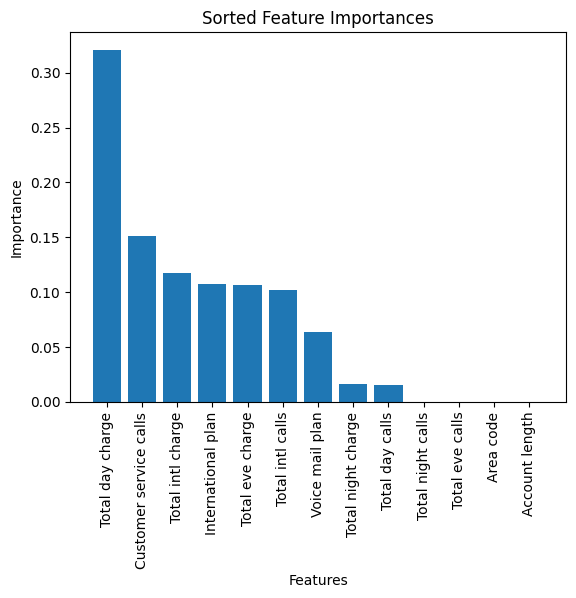

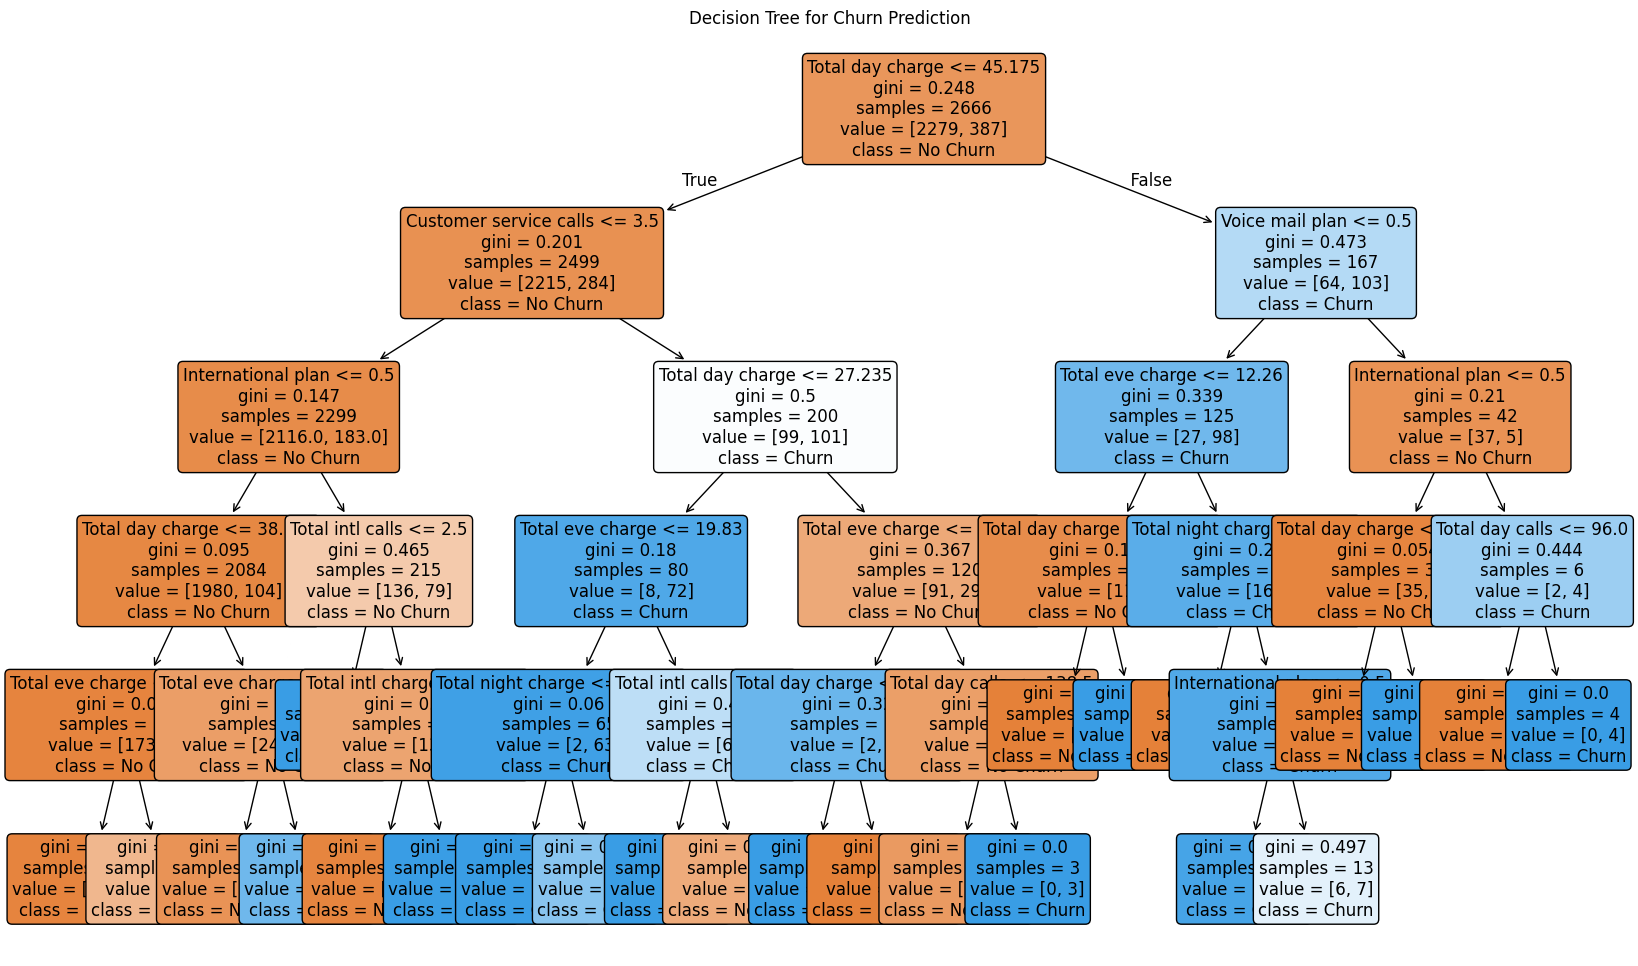

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       571
           1       0.81      0.69      0.75        96

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       571
           1       0.81      0.69      0.75        96

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667



In [311]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, Y_train)

importance_sum = 0

importance = model.feature_importances_

sorted_indices = importance.argsort()[::-1]  

sorted_features = [cleaned_concatenated_data.drop('Churn',axis=1).columns[i] for i in sorted_indices]
sorted_importance = [importance[i] for i in sorted_indices]



plt.bar(range(len(sorted_features)), sorted_importance)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)  
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Sorted Feature Importances')
plt.show()

plt.figure(figsize=(20, 12))
plot_tree(
    model, 
    filled=True,  
    feature_names=list(features),  
    class_names=['No Churn', 'Churn'],  
    rounded=True, 
    fontsize=12  
)

plt.title('Decision Tree for Churn Prediction')
plt.show()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))
print("Confusion Matrix:")
results['tree without smote'] = y_pred

print(classification_report(Y_test,y_pred))



#  most important features for decision tree are Total day charge customer services  calls ,voice mail plan (Without smote)

# Decision tree with smote

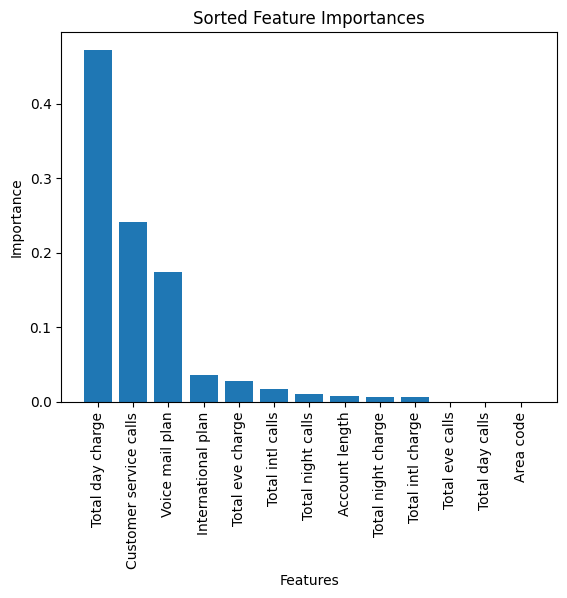

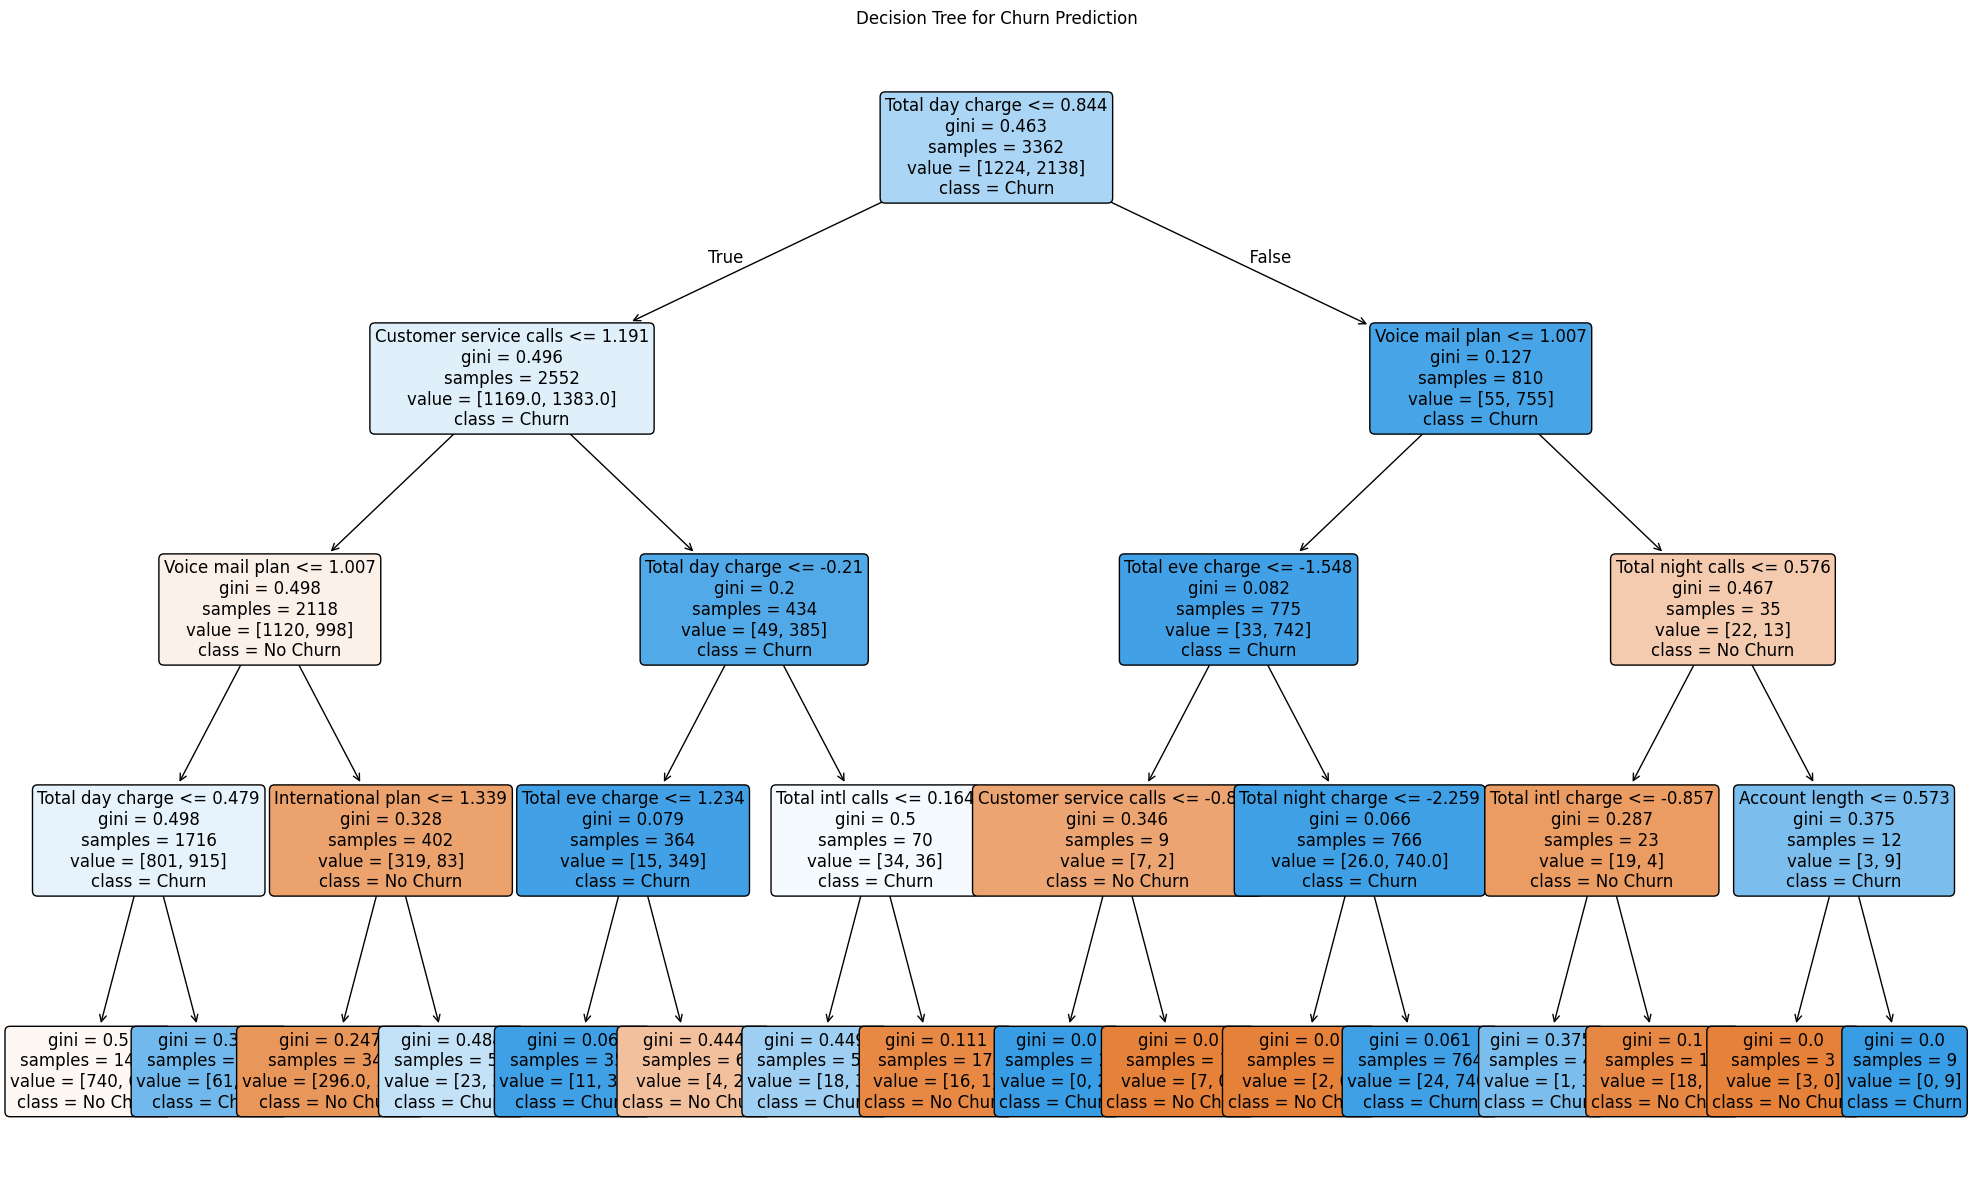

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       337
           1       0.90      0.65      0.76       504

    accuracy                           0.75       841
   macro avg       0.77      0.78      0.75       841
weighted avg       0.80      0.75      0.75       841



In [312]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train_smote, Y_train_smote)

importance_sum = 0

importance = model.feature_importances_

sorted_indices = importance.argsort()[::-1] 

sorted_features = [cleaned_concatenated_data.drop('Churn',axis=1).columns[i] for i in sorted_indices]
sorted_importance = [importance[i] for i in sorted_indices]


plt.bar(range(len(sorted_features)), sorted_importance)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)  
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Sorted Feature Importances')
plt.show()

plt.figure(figsize=(25, 15))
plot_tree(
    model, 
    filled=True,  
    feature_names=list(features),  
    class_names=['No Churn', 'Churn'], 
    rounded=True, 
    fontsize=12 
)

plt.title('Decision Tree for Churn Prediction')
plt.show()

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_smote)
accuracy = accuracy_score(Y_test_smote, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test_smote, y_pred))
results['tree with smote'] = y_pred




# most important features for decision tree are Total day charge  customer services calls  voice mail plan (with smote)

# random forest with smote

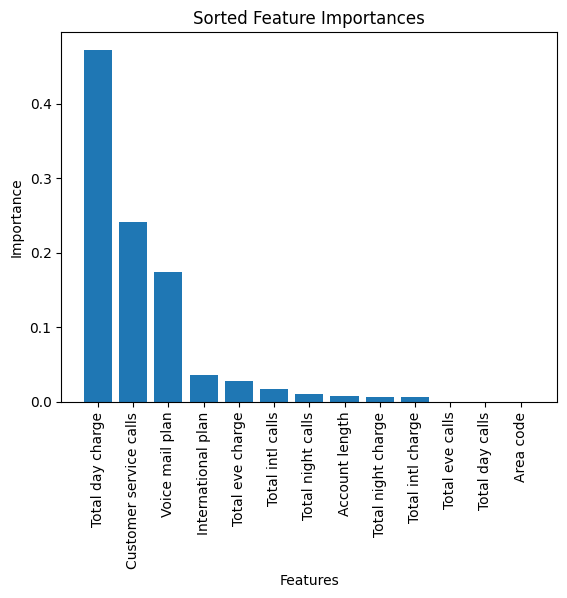

Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.63      0.75       337
           1       0.80      0.96      0.87       504

    accuracy                           0.83       841
   macro avg       0.85      0.80      0.81       841
weighted avg       0.84      0.83      0.82       841



In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, Y_train_smote)


y_pred = rf_model.predict(X_test_smote)



fpr, tpr, thresholds = roc_curve(Y_test_smote, y_pred)
roc_auc = auc(fpr, tpr)
importances = rf_model.feature_importances_

sorted_indices = importance.argsort()[::-1] 

sorted_features = [cleaned_concatenated_data.drop('Churn',axis=1).columns[i] for i in sorted_indices]
sorted_importance = [importance[i] for i in sorted_indices]


plt.bar(range(len(sorted_features)), sorted_importance)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)  
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Sorted Feature Importances')
plt.show()


print("Rapport de classification :\n", classification_report(Y_test_smote, y_pred))


results['random forest with smote'] = y_pred




# most important features in random forest are Total day charge  customer services calls and voices mail plan (without smote)

# Random forest without smote

AUC-ROC : 0.8333


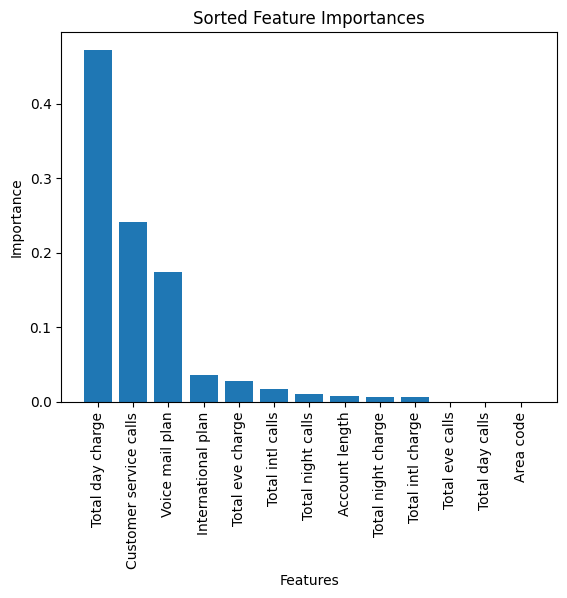

Rapport de classification :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       571
           1       0.92      0.68      0.78        96

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)


y_pred = rf_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC : {roc_auc:.4f}")
results['random forest without smote'] = y_pred

importances = rf_model.feature_importances_

sorted_indices = importance.argsort()[::-1] 

sorted_features = [cleaned_concatenated_data.drop('Churn',axis=1).columns[i] for i in sorted_indices]
sorted_importance = [importance[i] for i in sorted_indices]


plt.bar(range(len(sorted_features)), sorted_importance)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)  
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Sorted Feature Importances')
plt.show()

print("Rapport de classification :\n", classification_report(Y_test, y_pred))




# most important features in random forest are Total day call customer services voices mail plan  (with smote)

# V EValuation

# evaluating machine learning models based on diffrent metrics

In [315]:
pd.DataFrame(paper1_models)

            modelname                                              model  \
0                 SVC  (StandardScaler(), SVC(kernel='linear', probab...   
1    GradientBoosting  ([DecisionTreeRegressor(criterion='friedman_ms...   
2  LogisticRegression                               LogisticRegression()   
3        RandomForest  (DecisionTreeClassifier(max_features='sqrt', r...   
4        DecisionTree  DecisionTreeClassifier(max_depth=10, min_sampl...   
5            AdaBoost  (DecisionTreeClassifier(max_depth=1, random_st...   
6             XGBoost  XGBClassifier(base_score=None, booster=None, c...   
7                 ANN         <Sequential name=sequential_3, built=True>   

   accuracy  precision    recall   f1score       roc  pr-score  \
0  0.856072   0.000000  0.000000  0.000000  0.500000  0.143928   
1  0.947526   0.886076  0.729167  0.800000  0.856702  0.685078   
2  0.851574   0.411765  0.072917  0.123894  0.527702  0.163458   
3  0.943028   0.914286  0.666667  0.771084  0.82807

# Lime

## gradient boost

In [316]:
paper1_models_tabl = pd.DataFrame(paper1_models)

paper1_models_tabl = paper1_models_tabl.drop('preds',axis=1)
paper1_models_tabl = paper1_models_tabl.drop('model',axis=1)
paper1_models_tabl.style.background_gradient(cmap='YlOrRd', axis=0)


# Evaluation of DSo1  : :Implementing machine learning techniques for customer retention and churn prediction
## basedd on the last figures  and our strategie which was to focus on these  features (Customer service call ,  international plan /total int charge ,total day charge) when we used the kmeans  ,  the shapplot and the results  of every metric of each model we can say that the best model is the XGBOOST

# =======================================================
# Evaluation DSO2

# Wilcoxon test

In [317]:
from scipy.stats import wilcoxon

errors_gbm = abs(Y_test - GBM_y_pred)
errors_lr = abs(Y_test - LR_y_pred)
errors_rfc = abs(Y_test -  RFC_y_pred)
errors_xgb = abs(Y_test -  xgb_y_preds)
errors_ada = abs(Y_test -  ADA_y_preds)
errors_svc = abs(Y_test -  SVC_y_preds)


table5 = { 'model': [],'stat':[],'p_value':[]}


stat, p_value = wilcoxon(errors_gbm, errors_svc)
table5['model' ].append('svc')
table5['stat'].append(stat)
table5['p_value'].append(p_value)
stat, p_value = wilcoxon(errors_gbm, errors_lr)
table5['model' ].append('logistic Regression')
table5['stat'].append(stat)
table5['p_value'].append(p_value)
stat, p_value = wilcoxon(errors_gbm, errors_ada)
table5['model' ].append('adaBoost')
table5['stat'].append(stat)
table5['p_value'].append(p_value)
stat, p_value = wilcoxon(errors_gbm, errors_xgb)
table5['model' ].append('xgbBoost')
table5['stat'].append(stat)
table5['p_value'].append(p_value)
stat, p_value = wilcoxon(errors_gbm, errors_rfc)
table5['model' ].append('rfc')
table5['stat'].append(stat)
table5['p_value'].append(p_value)


# Roc for ensemble methods and logistic regression with grid search

In [318]:
table4_tab = pd.DataFrame(table4)
table4_tab.style.background_gradient(cmap='YlOrRd', axis=0)


In [319]:
table5_tab = pd.DataFrame(table5)
table5_tab

                 model   stat       p_value
0                  svc  231.0  2.115236e-13
1  logistic Regression  192.5  3.711635e-14
2             adaBoost  160.0  2.432643e-11
3             xgbBoost  210.0  6.790609e-12
4                  rfc   67.5  1.701872e-03

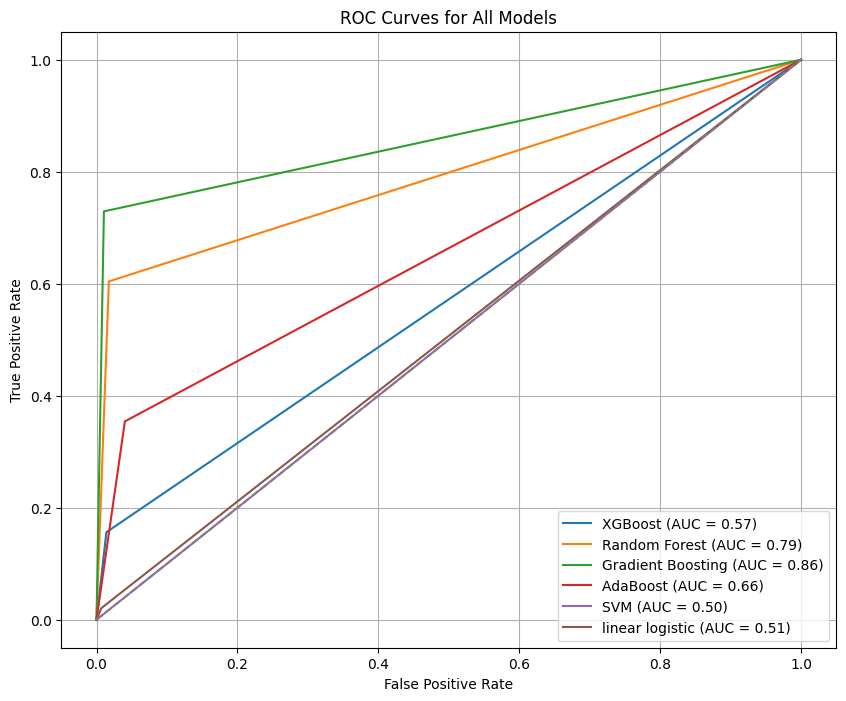

In [320]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

models_preds = {
    "XGBoost": xgb_y_preds,
    "Random Forest": RFC_y_pred,
    "Gradient Boosting": GBM_y_pred,
    "AdaBoost": ADA_y_preds,
    "SVM": SVC_y_preds,
    "linear logistic":LR_y_pred,
    #"neural network":nn_preds

}

plt.figure(figsize=(10, 8))
for model_name, preds in models_preds.items():
    fpr, tpr, _ = roc_curve(Y_test, preds)
    roc_auc = roc_auc_score(Y_test, preds)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# cross validation

In [321]:
from sklearn.model_selection import cross_val_score 
cross_val = {"modelname":[],"model":[],"cross_validation_scores":[],"mean_accuracy":[],"standard_deviation":[]}
k = 10 ###############################################################
kf = KFold(n_splits=k, shuffle=True, random_state=42)
for idx,model in enumerate(table4['model']):
    scores = cross_val_score(model, cleaned_concatenated_data.drop('Churn',axis=1), cleaned_concatenated_data['Churn'], cv=kf, scoring='accuracy')
    cross_val["modelname"].append(table4['modelname'][idx])
    cross_val["model"].append(model)
    cross_val["cross_validation_scores"].append(np.mean(scores))
    cross_val["mean_accuracy"].append(np.mean(scores))
    cross_val["standard_deviation"].append(np.std(scores))

c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\h3ch\Desktop\D\paper3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [322]:
cross_val_tab = pd.DataFrame(cross_val)
cross_val_tab.style.background_gradient(cmap='YlOrRd', axis=0)


In [323]:
table4_tab.style.background_gradient(cmap='YlOrRd', axis=0)


# Second DSo:Explaining customer churn prediction in telecom industry using tabular machine learning models
## from the previous result we can admit that the best model with grid search is gradient boosting
## we can see that  the shap plot can give us a good understanding on what features our gradient boosting ie relying on their predictions which can help us understand the reason behind customer churn and can help use optimize retention strategies

# ===================================================

# EValuation dso3

# Random foreest with without smote

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       571
           1       0.92      0.68      0.78        96

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

Confusion Matrix:


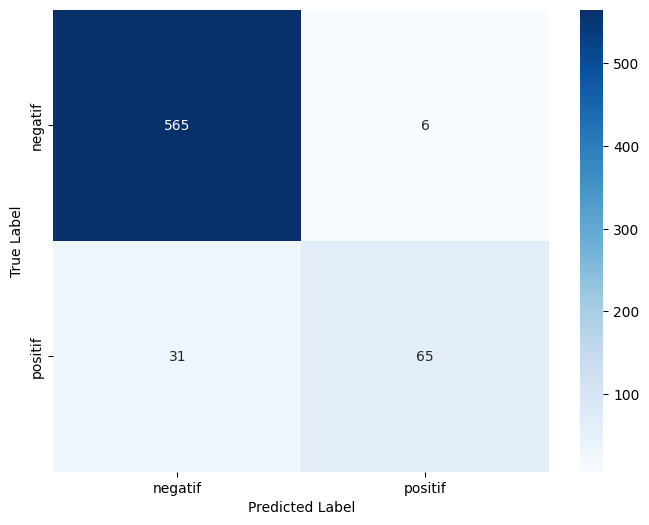

---------------------With smoteENN----------------------- 
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.63      0.75       337
           1       0.80      0.96      0.87       504

    accuracy                           0.83       841
   macro avg       0.85      0.80      0.81       841
weighted avg       0.84      0.83      0.82       841

Confusion Matrix:
[[213 124]
 [ 21 483]]


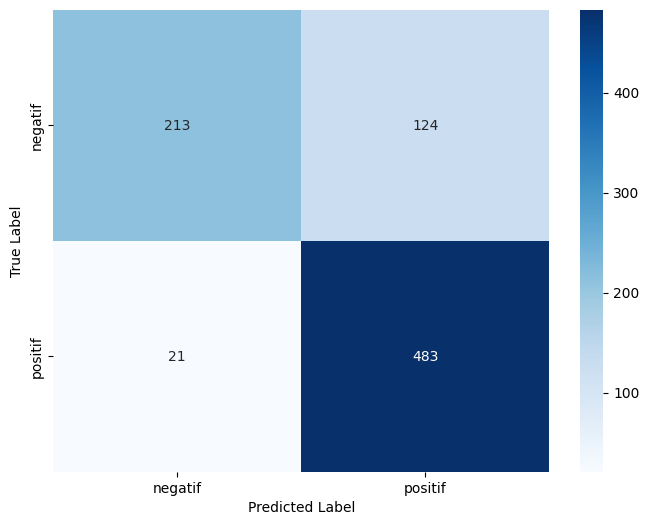

In [324]:
accuracy = accuracy_score(Y_test, results['random forest without smote'])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, results['random forest without smote']))
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(Y_test, results['random forest without smote'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negatif', 'positif'], 
            yticklabels=['negatif', 'positif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("---------------------With smoteENN----------------------- ")
accuracy = accuracy_score(Y_test_smote, results['random forest with smote'])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test_smote, results['random forest with smote']))
print("Confusion Matrix:")
print(confusion_matrix(Y_test_smote, results['random forest with smote']))
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(Y_test_smote, results['random forest with smote'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negatif', 'positif'], 
            yticklabels=['negatif', 'positif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Comparaison between Random forest with and without smoteENN
### As we can see  when the model was trained on the balanced data we got  a better result in the churned client (1) but the precision and recall.. in non churned client were decreased which is an obvious thing due to the unblancing

# =======================================================================

# DEcision tree with and without smote

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       571
           1       0.81      0.69      0.75        96

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:


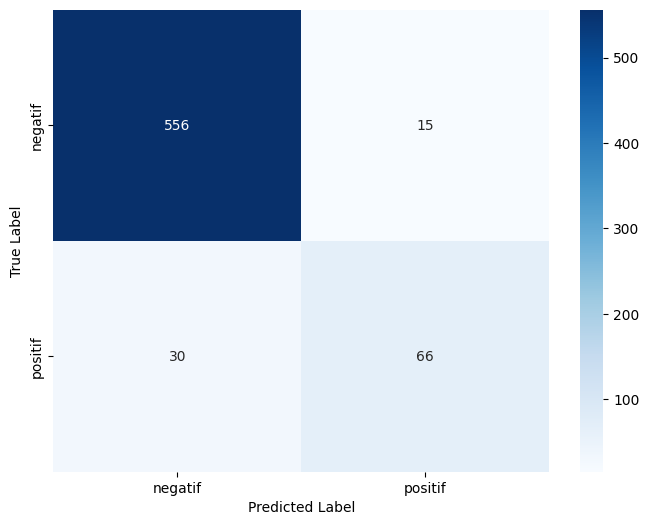

---------------------With smote----------------------- 
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       337
           1       0.90      0.65      0.76       504

    accuracy                           0.75       841
   macro avg       0.77      0.78      0.75       841
weighted avg       0.80      0.75      0.75       841

Confusion Matrix:
[[302  35]
 [174 330]]


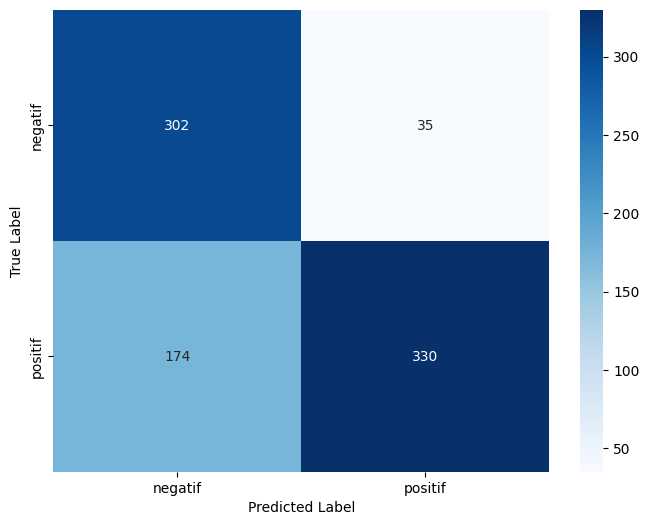

In [325]:

accuracy = accuracy_score(Y_test, results['tree without smote'])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, results['tree without smote']))
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(Y_test, results['tree without smote'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negatif', 'positif'], 
            yticklabels=['negatif', 'positif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("---------------------With smote----------------------- ")
accuracy = accuracy_score(Y_test_smote, results['tree with smote'])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test_smote, results['tree with smote']))
print("Confusion Matrix:")
print(confusion_matrix(Y_test_smote, results['tree with smote']))
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(Y_test_smote, results['tree with smote'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negatif', 'positif'], 
            yticklabels=['negatif', 'positif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## from what we can see in the previous result that the random forest gave us a better result without smote 
## from what we can see in the previous result that the decision tree gave us a better result without smote 

# Decision tree vs random forest

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       571
           1       0.92      0.68      0.78        96

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

Confusion Matrix:


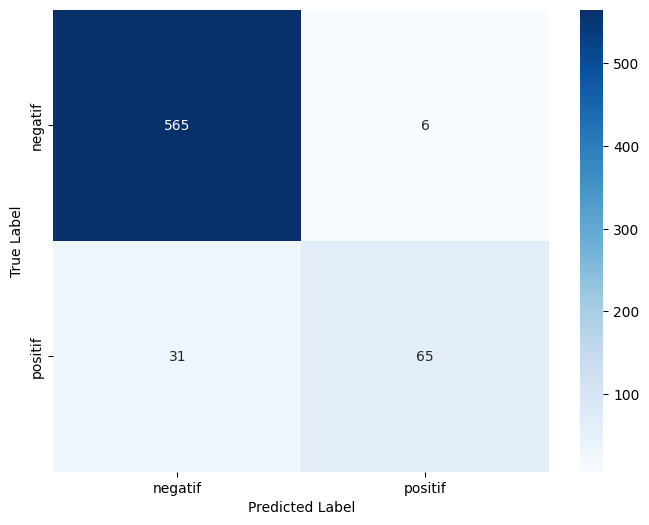

========================Decision tree======================
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       571
           1       0.81      0.69      0.75        96

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:


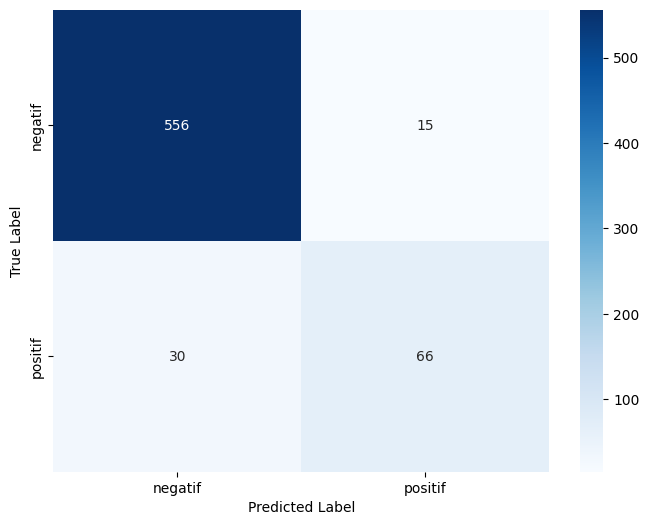

In [326]:
accuracy = accuracy_score(Y_test, results['random forest without smote'])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, results['random forest without smote']))
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(Y_test, results['random forest without smote'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negatif', 'positif'], 
            yticklabels=['negatif', 'positif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("========================Decision tree======================")
accuracy = accuracy_score(Y_test, results['tree without smote'])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, results['tree without smote']))
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(Y_test, results['tree without smote'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negatif', 'positif'], 
            yticklabels=['negatif', 'positif'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Third DSO :  Customer churn prediction in telecom sector using machine learning techniques 
# According to the metrics we can see that the best model is Random forest so we will use his primary features in the survival analysis


# VI Deployment 

# bo1 : 1- Minimize revenue loss by identifying the trends and behaviors that influence the likelihood of customer churn in the telecommunications industry and implementing retention strategies.


In [327]:
import shap
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist() ,class_names=['Churn'], verbose=True, mode='regression')
j = 5
exp = explainer.explain_instance(X_test.values[j], paper1_models['model'][6].predict, num_features=20)
exp.show_in_notebook(show_table=True)


Intercept 0.5330667476561282
Prediction_local [0.00574772]
Right: 0


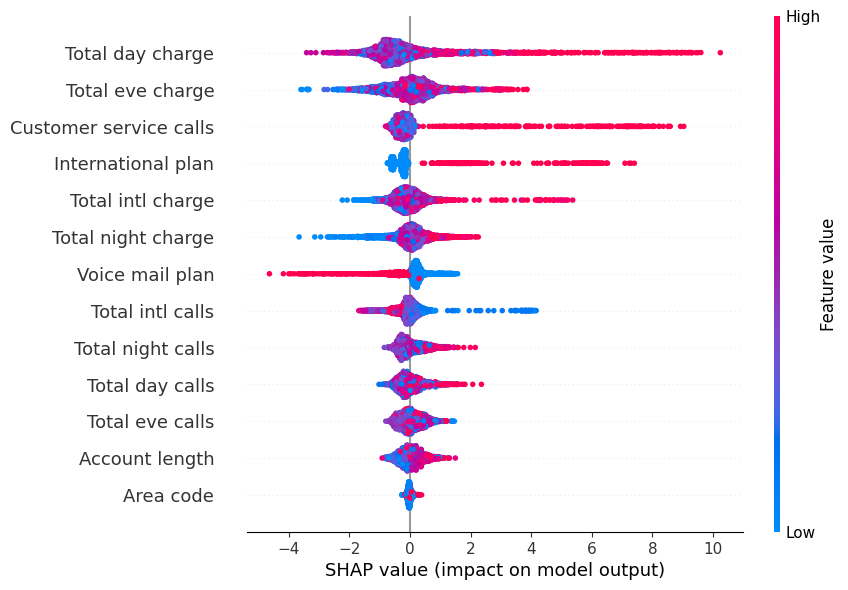

In [328]:
explainer = shap.Explainer(paper1_models['model'][6], X_train)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values ,max_display=20) 

# BO2 :# 2- Improve customer loyalty by finding the reason behind customer churn


## Based on the previous plots, which are derived from our best model, we can identify the key features that most influence customer churn. To improve our services, we should focus on these areas, particularly by offering more promotions related to total day charges and customer service interactions.

# Explainer model


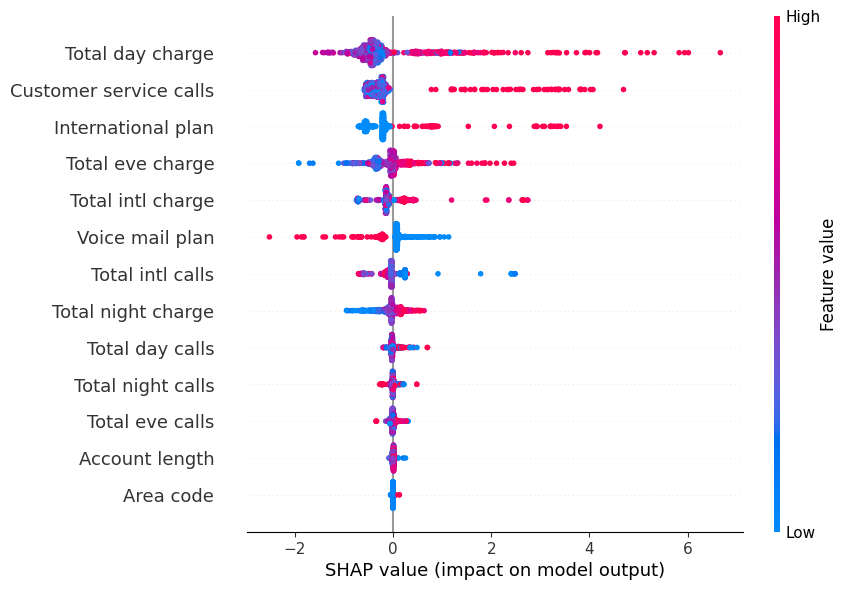

In [329]:

explainer = shap.Explainer(gradien_model, X_test)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values ,max_display=20)


# BO3- Help decision-makers to interve at the right time to prevent the churn operation

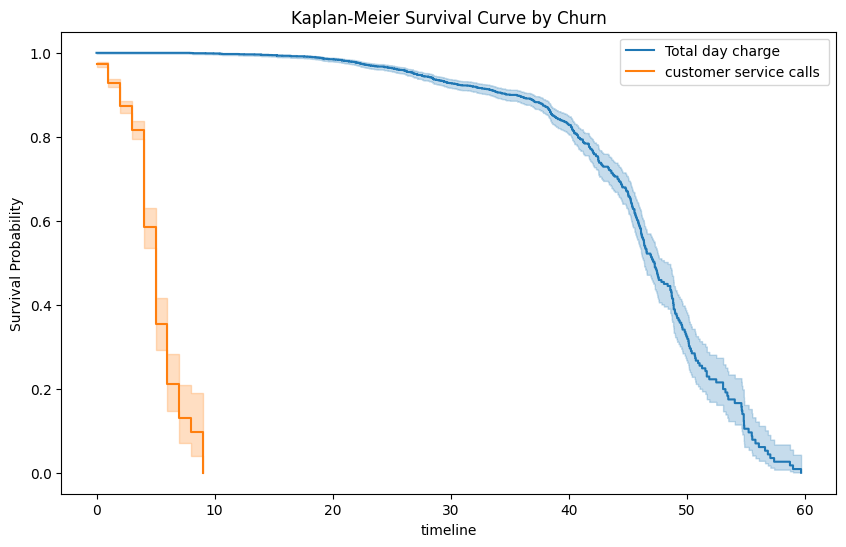

In [330]:
kmf_churn_0 = KaplanMeierFitter()

kmf_churn_1 = KaplanMeierFitter()
kmf_churn_1.fit(
    cleaned_concatenated_data["Total day charge"],
    event_observed=cleaned_concatenated_data["Churn"]
)
kmf_churn_0.fit(
    cleaned_concatenated_data["Customer service calls"],
    event_observed=cleaned_concatenated_data["Churn"]
)

plt.figure(figsize=(10, 6))
kmf_churn_1.plot_survival_function(label="Total day charge")
kmf_churn_0.plot_survival_function(label="customer service calls ")


plt.title("Kaplan-Meier Survival Curve by Churn")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


## the survival analysis is a very good tool for predicting when will the client churn or not and we can based on it help to make strategies in real time so all we need is a notifier when the survivng rate start to go down so we can prevent churn from occurring and we build our offer to our client based on his state where is he exactly in the surviving probability